In [179]:
import urllib.request, json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt





### getting energy data from U.S. Energy Information Administration (EIA) servers 

### build dict with needed series id and associated name 


In [180]:
# data to grap from eia website. all data for Saudi Arabia only


series_id = ['INTL.44-1-SAU-TJ.A',
             'INTL.44-2-SAU-TJ.A',
             'INTL.2-2-SAU-BKWH.A',
             'INTL.2-7-SAU-MK.A',
             'INTL.2-12-SAU-BKWH.A',
             'INTL.5-2-SAU-TBPD.A',
             'INTL.26-1-SAU-BCM.A',
             'INTL.26-2-SAU-BCM.A',
             'INTL.28-7-SAU-MK.A',
             'INTL.28-12-SAU-BKWH.A',
             'INTL.47-33-SAU-MBTUPP.A',
             'INTL.47-34-SAU-TBTUUSDPP.A',
             'INTL.4701-34-SAU-BDOLPPP.A',
             'INTL.4702-33-SAU-THP.A',
             'INTL.5-2-SAU-TJ.A',
             'INTL.4415-1-SAU-QBTU.A',
             'INTL.26-1-SAU-TJ.A',
             'INTL.26-2-SAU-TJ.A',
             'INTL.62-1-SAU-TBPD.A',
             'INTL.62-2-SAU-TBPD.A'
            ]

series_name = ['primary_energy_production',
               'primary_energy_consumption',
               'electricity_consumption',
               'electricity_installed_capacity',
               'electricity_generation',
               'petroleum_consumption',
               'dry_natural_gas_production',
               'dry_natural_gas_consumption',
               'fossils_electricity_installed_capacity',
               'fossils_electricity_generation',
               'energy_consumption_capita',
               'energy_consumption_gdp',
               'gdp',
               'population',
               'petroleum_consumption_energy',
               'petroleum_production_energy',
               'dry_natural_gas_production_energy',
               'dry_natural_gas_consumption_energy',
               'gasoline_production',
               'gasoline_consumption'
]

# make dictionary of the data id and names

name_dict = {'series_id': series_id , 'series_name':series_name}

In [181]:
# grap the data from eia and stores them in a dictionary with a name and a pandas df that containts the data

def grap_eia_data(api,name_dict):
    
    # grap eia data and stores it in dataframe 
    '''
    INPUT 
        api - your api key for eia.gov ' string'
        name_dict - a dictionary that contains eia series id for the data you want to grap

        
    OUTPUT
        eia_data - a dictionary that contains pandas df for all the data that you grapped
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    
    eia_data = {}
    print('grapping below datasets:\n')
    for idx, val in enumerate(name_dict['series_id']):
        series_name = name_dict['series_name'][idx]
        
        print(idx+1, "=>",series_name, val)
     
        series_id = val # data series id to download 
        api_call = 'http://api.eia.gov/series/?api_key=' + api+ '&series_id=' + series_id # api call link for eia servers 

        # reading JSON data
        with urllib.request.urlopen(api_call) as url:
            json_data = json.loads(url.read().decode())
        
        # storing JSON data into pandas df
        df=pd.io.json.json_normalize(json_data['series'],'data')
        df.columns = ['date' , 'val']
        df.date = pd.to_numeric(df.date , errors='coerce')  
        df.units = json_data['series'][0]['units']
    
        eia_data[series_name] = df
        
    return eia_data

In [182]:
API_key = 'ab79ae0cf3c01df774c540194b6b7c18' # key for my eia.gov account
eia_data=grap_eia_data(API_key,name_dict)

grapping below datasets:

1 => primary_energy_production INTL.44-1-SAU-TJ.A
2 => primary_energy_consumption INTL.44-2-SAU-TJ.A
3 => electricity_consumption INTL.2-2-SAU-BKWH.A
4 => electricity_installed_capacity INTL.2-7-SAU-MK.A
5 => electricity_generation INTL.2-12-SAU-BKWH.A
6 => petroleum_consumption INTL.5-2-SAU-TBPD.A
7 => dry_natural_gas_production INTL.26-1-SAU-BCM.A
8 => dry_natural_gas_consumption INTL.26-2-SAU-BCM.A
9 => fossils_electricity_installed_capacity INTL.28-7-SAU-MK.A
10 => fossils_electricity_generation INTL.28-12-SAU-BKWH.A
11 => energy_consumption_capita INTL.47-33-SAU-MBTUPP.A
12 => energy_consumption_gdp INTL.47-34-SAU-TBTUUSDPP.A
13 => gdp INTL.4701-34-SAU-BDOLPPP.A
14 => population INTL.4702-33-SAU-THP.A
15 => petroleum_consumption_energy INTL.5-2-SAU-TJ.A
16 => petroleum_production_energy INTL.4415-1-SAU-QBTU.A
17 => dry_natural_gas_production_energy INTL.26-1-SAU-TJ.A
18 => dry_natural_gas_consumption_energy INTL.26-2-SAU-TJ.A
19 => gasoline_production INT

In [331]:
eia_data.keys()

dict_keys(['primary_energy_production', 'primary_energy_consumption', 'electricity_consumption', 'electricity_installed_capacity', 'electricity_generation', 'petroleum_consumption', 'dry_natural_gas_production', 'dry_natural_gas_consumption', 'fossils_electricity_installed_capacity', 'fossils_electricity_generation', 'energy_consumption_capita', 'energy_consumption_gdp', 'gdp', 'population', 'petroleum_consumption_energy', 'petroleum_production_energy', 'dry_natural_gas_production_energy', 'dry_natural_gas_consumption_energy', 'gasoline_production', 'gasoline_consumption'])

In [335]:
# checking units of the data series
print('unit for primary energy is: ',eia_data['primary_energy_consumption'].units)
print('unit for petroleum consumption is: ',eia_data['petroleum_consumption'].units)
print('unit for natural gas consumption is: ',eia_data['dry_natural_gas_consumption'].units)

unit for primary energy is:  Tera Joules
unit for petroleum consumption is:  Thousand Barrels Per Day
unit for natural gas consumption is:  Billions Cubic Meters


notice how the energy and petroleum consumption have different units. this makes sense actually since normally we think of petroleum (oil) consumption as a volume consumption (a certain amount of liters ... etc). 

but for our purposes in this small project, I'm investigating energy uses. petroleum and gas are used heavily in energy through the combustion process. so a given volume of petrol or natural gas can actually be converted to energy using the heat content of the fuel. this is what I'll be doing next. 

this conversion is important in order to compare apples to apples. 

in next sections, I'll actually use EIA data which have this conversions builtin already. this is very accurate because EIA   data corrects for yearly varaiton of heat content.

### getting energy data from KAPSARC King Abdullah Petroleum Studies and Research Center

In [680]:
elec_cons_sector= pd.read_csv("electricity-by-sector-GWh.csv", decimal=",") # notice that using decimal="," makes data to TWh
elec_power_peak = pd.read_csv("electricity-peak-load-MW.csv", delimiter=";")
elec_power_peak=elec_power_peak.sort_values('Year').reset_index(drop=True)
elec_cons_mix = pd.read_csv("fuel-mix-for-electricity-generation-TBTU.csv")

In [676]:
elec_cons_sector.head()

,year,Residential,Commercial,Government,Industrial,Other
0,2005,78.304,15.580,16.675,33.800,8.924
1,2006,86.029,17.075,18.005,32.549,9.497
2,2007,89.904,19.440,19.802,30.635,10.001
3,2008,96.687,21.366,20.457,32.421,10.166
4,2009,100.832,23.605,22.248,34.654,12.133


In [679]:
elec_power_peak.head()

,Year,Peak_load
0,1990,13069.0
1,1991,12889.0
2,1992,14389.0
3,1993,16136.0
4,1994,17387.0


In [681]:
elec_cons_mix.head()

,year,Natural_gas,crude_oil,HFO,Diesel,Total
0,2007,1212,322,423,387,2344
1,2008,1273,381,466,418,2538
2,2009,1222,805,317,452,2796
3,2010,1284,1048,252,457,3041
4,2011,1377,1042,267,448,3134


### Explore and analyze EIA data

In [185]:
# convert petrol consumption data to GigaWatthours (GWh)
petrolum_conv = 5.615*365*1000/3412.0 # multiply 1000 barrels per day to get GWh per year 
petrolum_conv*eia_data['petroleum_consumption'].val[0:5]


0    1.983402e+06
1    2.065148e+06
2    1.915044e+06
3    1.768709e+06
4    1.777303e+06
Name: val, dtype: float64

In [186]:
petrolum_conv*eia_data['petroleum_consumption'].val[4]*3.6/6317674.729

1.012760306547491

In [187]:
eia_data['dry_natural_gas_consumption'].units

'Billions Cubic Meters'

In [188]:
# convert natural gas  consumption data to GigaWatthours (GWh)
gas_conv = 1040*1000*(3.28084**3)/3412.0 # multiply Billions Cubic Meters of gas per year to get GWh per year 
gas_conv*eia_data['dry_natural_gas_consumption'].val[0:5]

0    1.176208e+06
1    1.139707e+06
2    1.101613e+06
3    1.081268e+06
4    1.055219e+06
Name: val, dtype: float64

In [189]:
gas_conv*eia_data['dry_natural_gas_consumption'].val[5]*3.6/3799231.0677163

0.9933555620133029

In [191]:
eia_data['electricity_consumption'].units

'Billion Kilowatthours'

In [192]:
# adding the contribution of both natural gas and petroleum of every year the data is available for both of them. 
sum2 = np.array((gas_conv*eia_data['dry_natural_gas_consumption'].val[1:]) +  np.array(petrolum_conv*eia_data['petroleum_consumption'].val))/1000

### plotting Saudi Arabia consumption energy data 

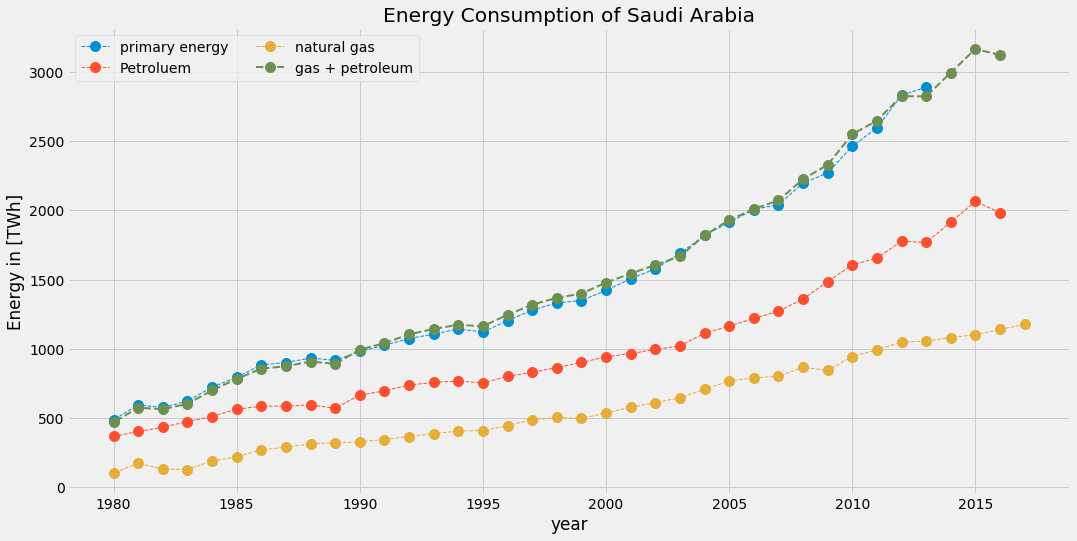

In [193]:
# plotting primary energy consumption and its main two components

# style
plt.style.use('fivethirtyeight')

# multiple line plot

marker_size = 10
lw = 1
plt.figure(figsize=[16,8])
plt.plot(eia_data['primary_energy_consumption'].date,eia_data['primary_energy_consumption'].val/3600,
        'o--', linewidth=lw, markersize=marker_size,label='primary energy');
#plt.plot(eia_data['electricity_consumption'].date,eia_data['electricity_consumption'].val,
#        'o--', linewidth=lw, markersize=marker_size,label='electricity');
plt.plot(eia_data['petroleum_consumption'].date,eia_data['petroleum_consumption'].val*petrolum_conv/1000,
        'o--', linewidth=lw, markersize=marker_size,label='Petroluem');
plt.plot(eia_data['dry_natural_gas_consumption'].date,eia_data['dry_natural_gas_consumption'].val*gas_conv/1000,
        'o--', linewidth=lw, markersize=marker_size,label='natural gas');
plt.plot(eia_data['dry_natural_gas_consumption'].date[1:],sum2,
        'o--', linewidth=lw+1, markersize=marker_size,label='gas + petroleum');
# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Energy Consumption of Saudi Arabia")#, loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("year")
plt.ylabel("Energy in [TWh]")
plt.show()

### some remarks on above plot


what the plot above shows is the primary energy consumption of Saudi Arabia. and its two main components sources: petroleum and natural gas. 

Primary energy is the energy in the form that it is first accounted for in a statistical energy balance, before any transformation to secondary or tertiary forms of energy [eia https://www.eia.gov/tools/glossary/index.php?id=P  ]. 

Suadi Arabia satisfies almost all of its primary energy from these two fossil fuel sources. 

the data I used for both petroleum and natural gas are not in terms of energy units but in terms of volume quantity. for this reason, the data needed to be converted to energy units using heat content of the fuel source. notice that eia provides petroleum and gas consumption data series in terms of energy units directly and those should've been used to get more accurate energy conversion data.

ok so after downloading the data for petroleum and gas in terms of energy let's recreate the enrgy consumption plot 

In [194]:
# checking units of data
eia_data['petroleum_consumption_energy'].units

'Tera Joules'

In [195]:
eia_data['dry_natural_gas_consumption_energy'].units

'Tera Joules'

In [206]:
# sum of petroleum and gas energies in TWh
# notice, we have more data for gas than petroleum that is why I'm deleting some gas data 
sum2_energy = (eia_data['dry_natural_gas_consumption_energy']['val'][3:].values + eia_data['petroleum_consumption_energy']['val'].values)/3600

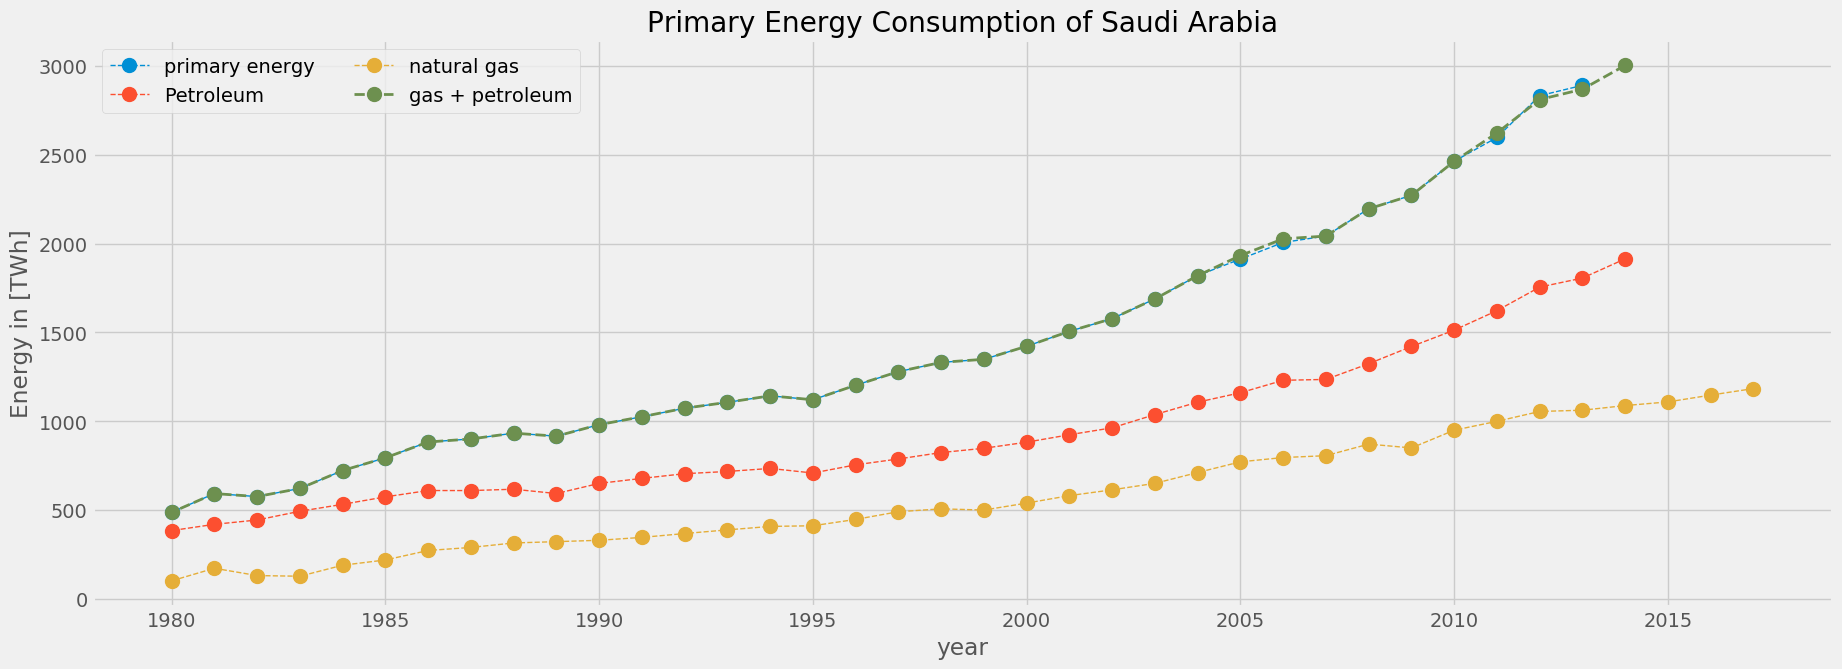

In [327]:
# plotting consumption data after using EIA energy converted units for petrol and gas consumption.

# style
plt.style.use('fivethirtyeight')

# multiple line plot

marker_size = 10
lw = 1
plt.figure(figsize=[20,7])
plt.plot(eia_data['primary_energy_consumption'].date,eia_data['primary_energy_consumption'].val/3600,
        'o--', linewidth=lw, markersize=marker_size,label='primary energy');
#plt.plot(eia_data['electricity_consumption'].date,eia_data['electricity_consumption'].val,
#        'o--', linewidth=lw, markersize=marker_size,label='electricity');
plt.plot(eia_data['petroleum_consumption_energy'].date,eia_data['petroleum_consumption_energy'].val/3600,
        'o--', linewidth=lw, markersize=marker_size,label='Petroleum');
plt.plot(eia_data['dry_natural_gas_consumption_energy'].date,eia_data['dry_natural_gas_consumption_energy'].val/3600,
        'o--', linewidth=lw, markersize=marker_size,label='natural gas');
plt.plot(eia_data['dry_natural_gas_consumption_energy'].date[3:],sum2_energy,
        'o--', linewidth=lw+1, markersize=marker_size,label='gas + petroleum');
# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Primary Energy Consumption of Saudi Arabia")#, loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("year")
plt.ylabel("Energy in [TWh]")
plt.show()

as you can see above, once the actual data for gas and petrol energy conversion from EIA is used, primary energy consumption matches perfectly the sum of these two main energy sources

let's make a bar chart to see the contribution percentage of each gas and petrol in the total energy consumption. this will allows us to understand better the split between oil and gas usage in satisfying energy needs.


In [339]:
# create new variables name for convenience [ primary consumption data]

x_gas     = np.flip(eia_data['dry_natural_gas_consumption_energy']['date'][4:].values)
gas       = np.flip(eia_data['dry_natural_gas_consumption_energy']['val'][4:].values)

petrol    = np.flip(eia_data['petroleum_consumption_energy']['val'][1:].values)
x_petrol  = np.flip(eia_data['petroleum_consumption_energy']['date'][1:].values)

primary   = np.flip(eia_data['primary_energy_consumption']['val'].values)
x_primary = np.flip(eia_data['primary_energy_consumption']['date'].values)



In [340]:
# calculating percentage contribution of each gas + petrol into the total primary energy as a percentage 

gas_percent = 100*gas/primary
petrol_percent = 100*petrol/primary


In [341]:
plt.close('all')

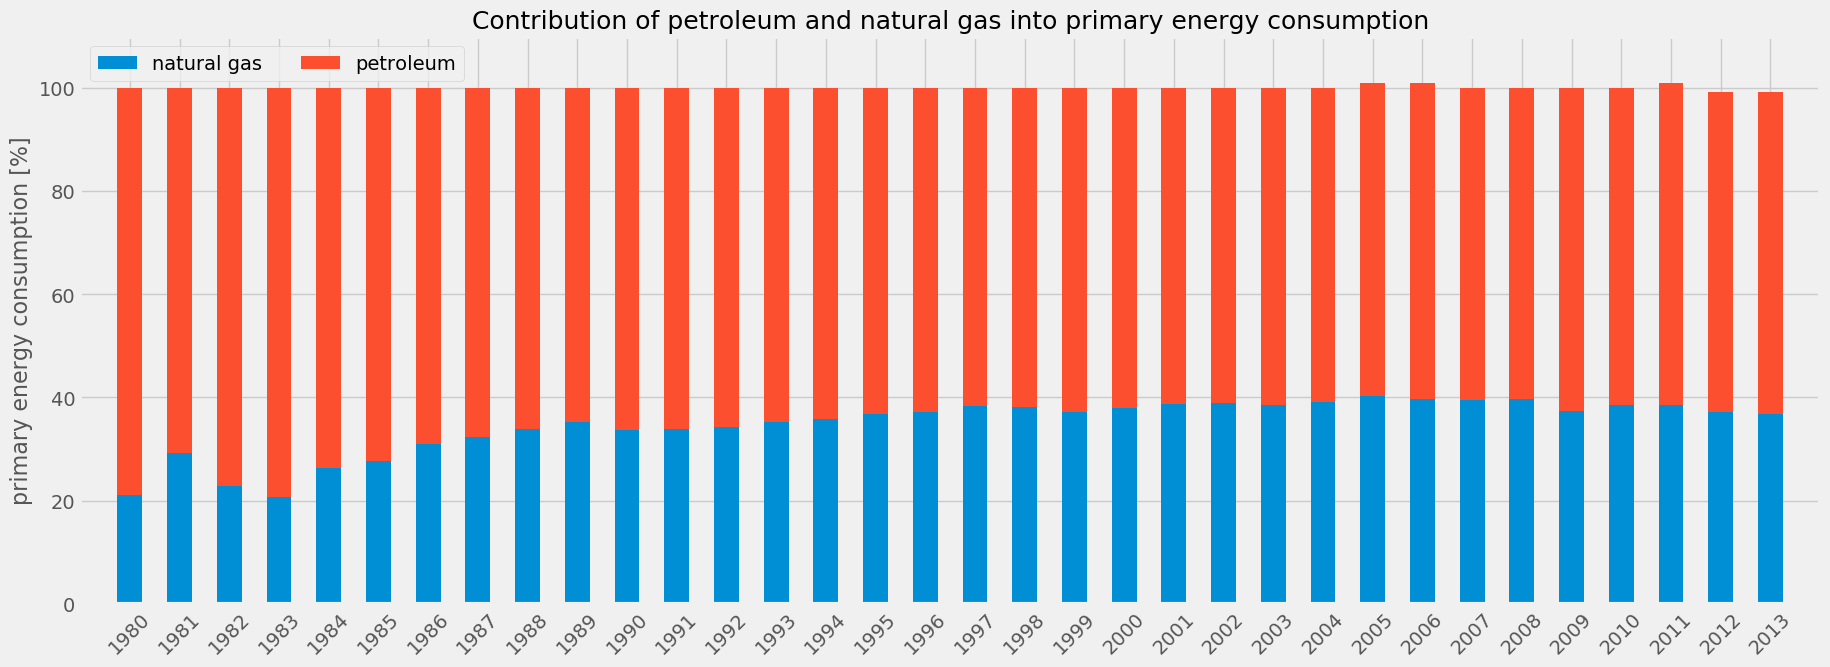

In [428]:
# plotting Contribution of petroleum and natural gas into primary energy consumption as a stacked bar chart 

# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(x_gas))    # the x locations for the groups
width = .5       # the width of the bars: can also be len(x) sequence

# add stacked values
plt.bar(ind, gas_percent, width,label='natural gas')
plt.bar(ind, petrol_percent, width,bottom=gas_percent,label='petroleum')

# axes ticks
x_ticks_label = list(map(str,x_gas.tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)

# modify axes to look nice
# ax.set_axisbelow(True)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.grid(color='gray',alpha=.6)

# limits on axes 
plt.xlim(min(ind)-1,max(ind)+1)
plt.ylim(0,110)

plt.legend(loc=2,ncol=2,fontsize = 14)

# axes titles
plt.ylabel('primary energy consumption [%]',fontsize = 16)
plt.title('Contribution of petroleum and natural gas into primary energy consumption',fontsize = 18)
plt.show()

In [482]:
# mean over all years:
print(gas_percent.mean())
print(petrol_percent.mean())

34.736910171130155
65.30246868015993


In [483]:
# mean from 2000 and above 
cond1 = np.where(x_gas == 2000)[0][0]
print(gas_percent[cond1:].mean())
print(petrol_percent[cond1:].mean())

38.63684014526849
61.46500358734374


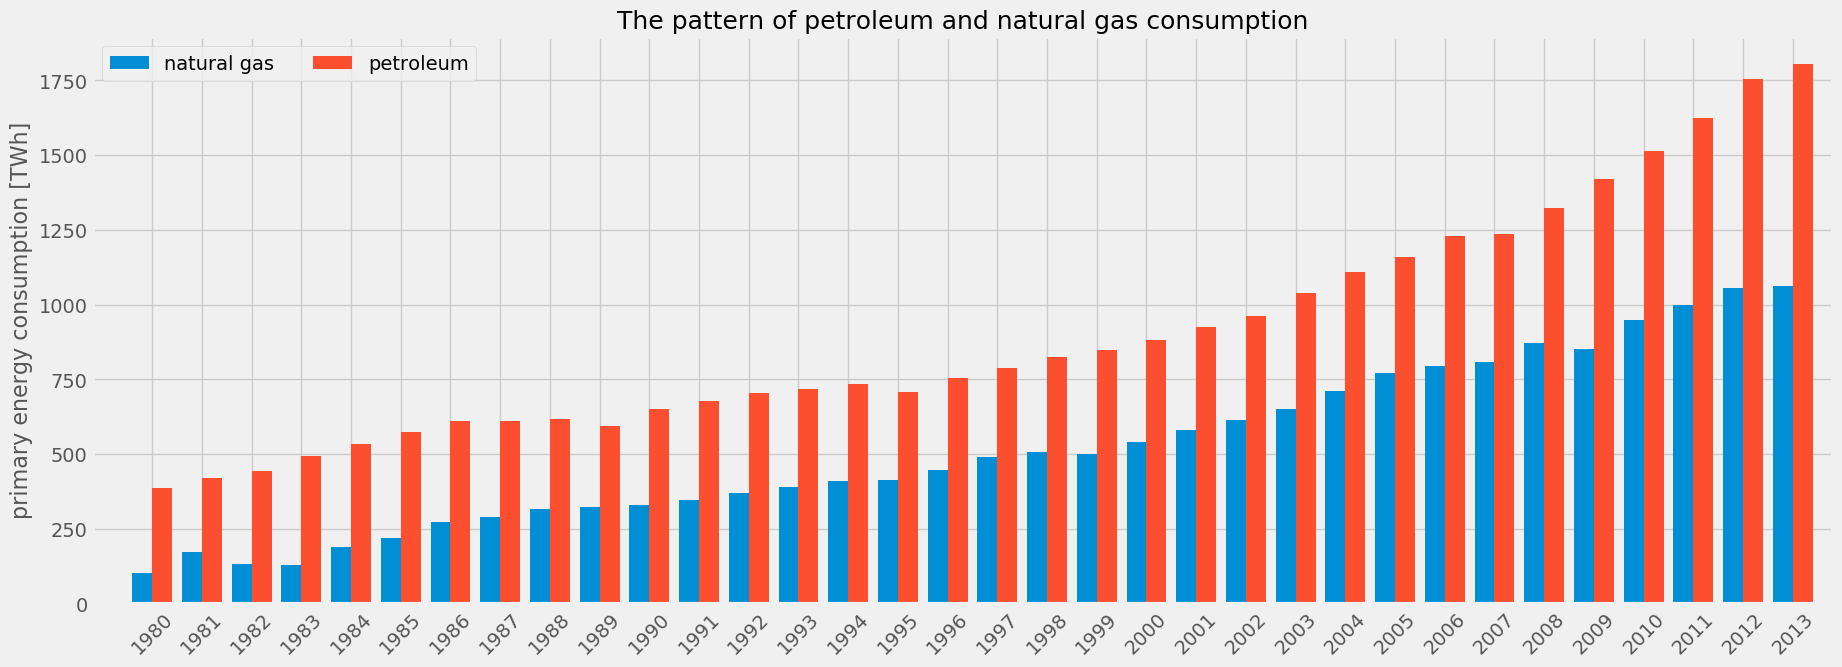

In [427]:
# plotting the actual consumption values as a grouped bar chart 


# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(x_gas))    # the x locations for the groups
width = .4      # the width of the bars: can also be len(x) sequence
in_between = width/2
# add grouped values
plt.bar(ind, gas/3600, width,label='natural gas')
plt.bar(ind+width, petrol/3600, width,label='petroleum')

# axes ticks
x_ticks_label = list(map(str,x_gas.tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind+(.5*width),x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)

# modify axes to look nice
# ax.set_axisbelow(True)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.grid(color='gray',alpha=.6)

# limits on axes 
plt.xlim(min(ind)-1,max(ind)+1)
# plt.ylim(0,110)

plt.legend(loc=2,ncol=2,fontsize = 14)

# axes titles
plt.ylabel('primary energy consumption [TWh]',fontsize = 16)
plt.title('The pattern of petroleum and natural gas consumption',fontsize = 18)
plt.show()

the plot grouped bar plot of the petroleum and natural gas consumption in terms of their heat energy content shows that Saudi Arabia energy consumption is increasing every year. in fact, both petroleum and natural gas consumption increases every year. ( with a small exception in 2009 in which natural gas consumption decreased compared with 2008)

it is interesting to see the percentage growth of these both quantities. let us say from 200 until 2013. 

we will make more sense of these huge unit values soon when looking at normalized energy values. like energy consumption intensity which normalizes the yearly consumption by the number of people. more interesting patter to come:). 

### plotting percentage growth data

In [379]:
# getting index for year 2000 

idx1=np.where(x_primary == 2000)[0][0]
idx2=np.where(x_primary == 2013)[0][0]
x_primary[idx1:idx2+1]

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013], dtype=int64)

In [380]:
# making percentage growth values based on the year 2000

primary_growth = 100*(primary[idx1+1:]-primary[idx1])/primary[idx1]
gas_growth = 100*(gas[idx1+1:]-gas[idx1])/gas[idx1]
petrol_growth = 100*(petrol[idx1+1:]-petrol[idx1])/petrol[idx1]
x_growth = x_primary[idx1+1:]

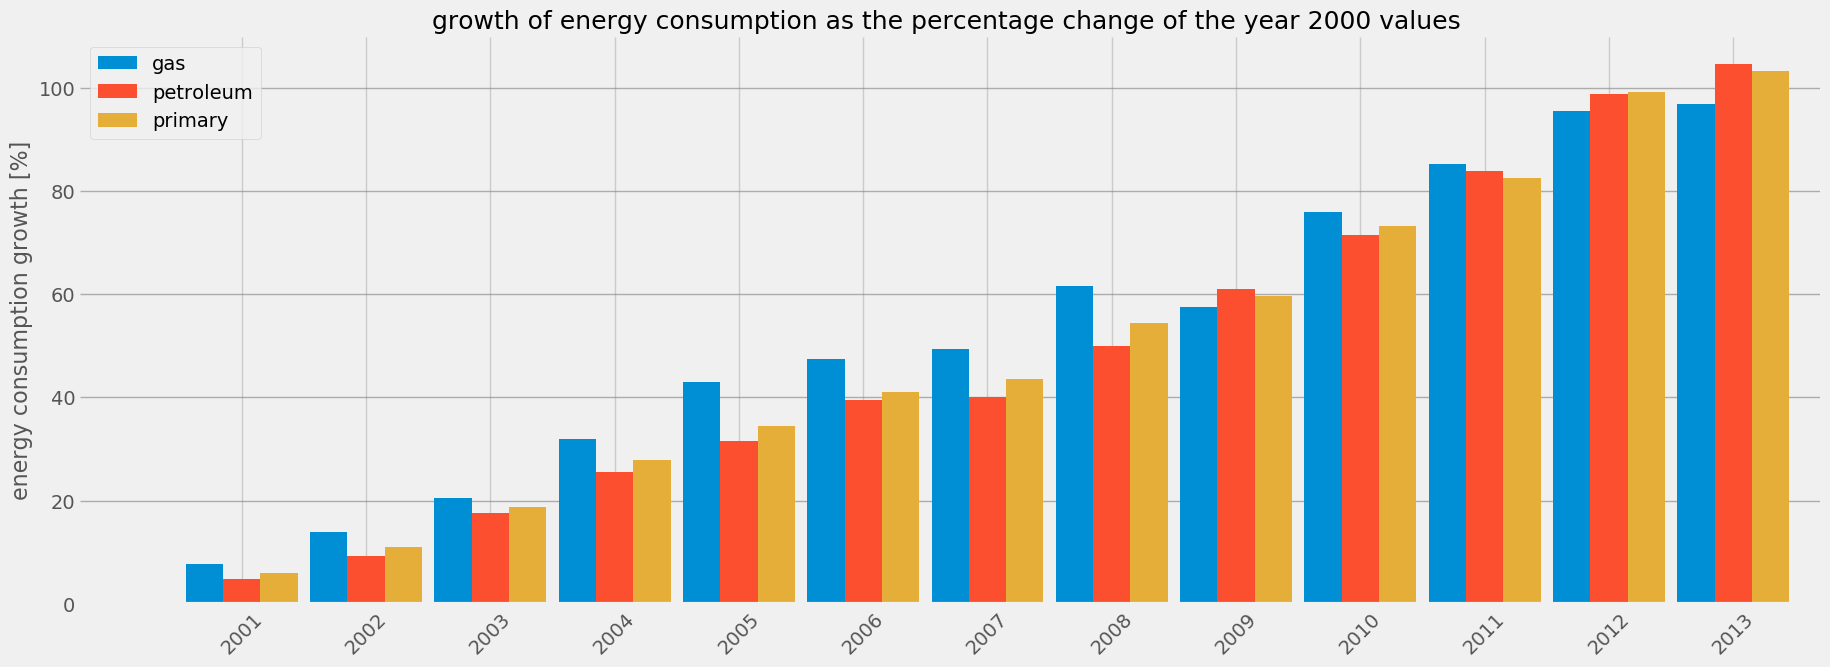

In [426]:
# plotting percentage growth values based on the year 2000 as a grouped bar chart 


# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(x_growth))    # the x locations for the groups
width = .3     # the width of the bars: can also be len(x) sequence
in_between = width/2
# add grouped values
plt.bar(ind, gas_growth, width,label='gas')
plt.bar(ind+width, petrol_growth, width,label='petroleum')
plt.bar(ind+width+width, primary_growth, width,label='primary')

# axes ticks
x_ticks_label = list(map(str,x_growth.tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind+width,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)

# modify axes to look nice
# ax.set_axisbelow(True)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.grid(color='gray',alpha=.6)

# limits on axes 
plt.xlim(min(ind)-1,max(ind)+1)
# plt.ylim(0,110)

plt.legend(loc=2,ncol=1,fontsize = 14)

# axes titles
plt.ylabel('energy consumption growth [%]',fontsize = 16)
plt.title('growth of energy consumption as the percentage change of the year 2000 values ',fontsize = 18)
plt.show()

the plot shows clearly the continuous increase in energy consumption. basically, the data shows that between 2001 - 2013, energy consumption has doubled. compared to the year 2000 consumption values, the growth in gas consumption up to 2008 had been faster than petroleum. petroleum growth generally speaking took the lead on gas after 2008. 

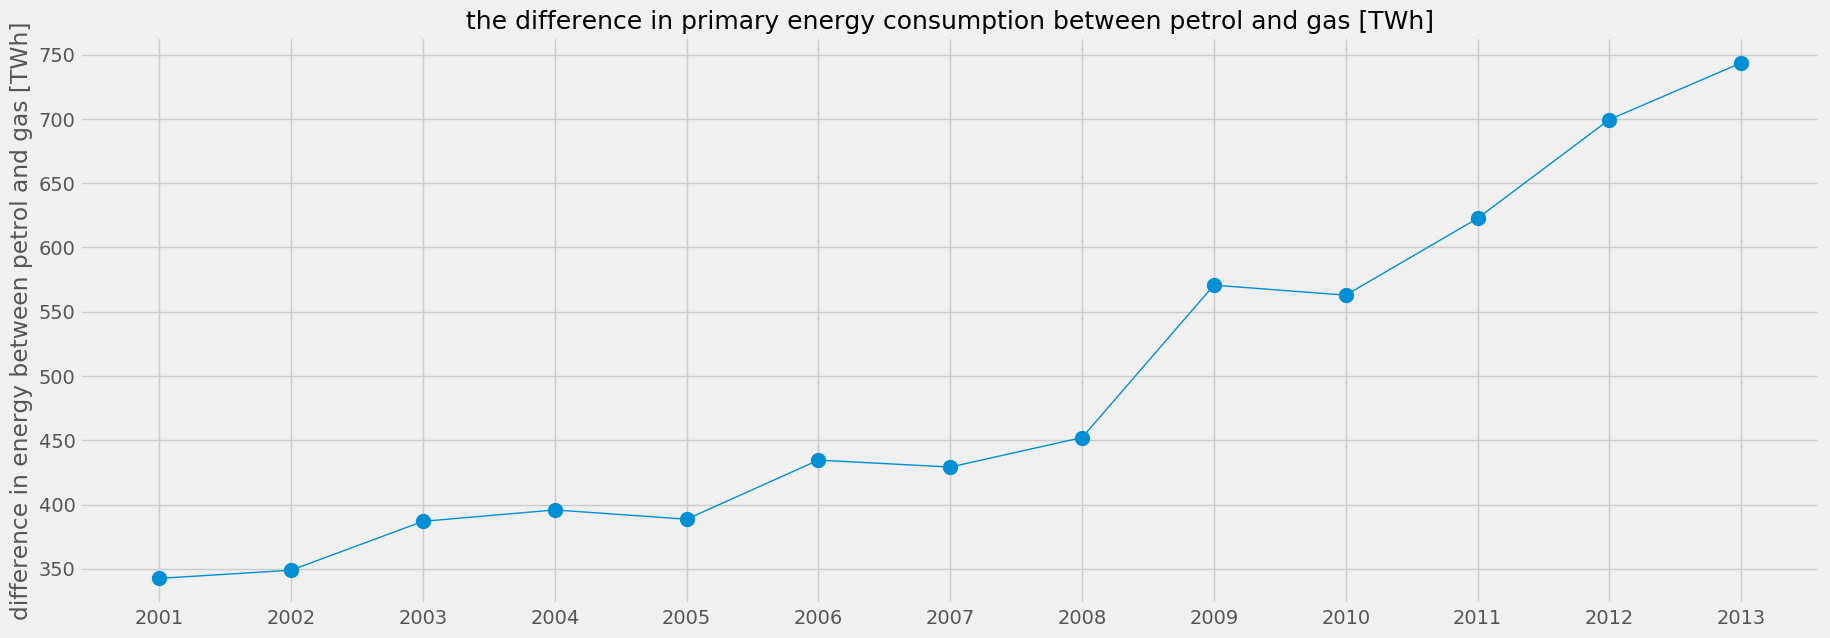

In [479]:
# calculate the difference in energy between petrol and gas for each year
diff= (petrol[idx1+1:] - gas[idx1+1:])/3600

# plotting the difference in energy between petrol and gas for each year

# style
plt.style.use('fivethirtyeight')

# line plot
marker_size = 10
lw = 1
fig=plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(1,1,1)
plt.plot(x_growth,diff,'o-', linewidth=lw, markersize=marker_size,label='difference')
plt.xticks(x_growth)
# figure title
plt.ylabel('difference in energy between petrol and gas [TWh]')
plt.title('the difference in primary energy consumption between petrol and gas [TWh]',fontsize = 18)


plt.show()

the above line plot shows explicit the difference in energy consumption between petrol and gas. the plot shows that the increasing demand for energy in Saudi Arabain is continuously met by an increase in petroleum consumption. this can be inferred from the general upward trend in energy difference. this is spacially true after the year 2008.  notice that this s interesting since on average from 2000 onwards natural gas contributes about 39% of the energy mix.

In [406]:
# making percentage growth values based on the previous year starting from the year 2000

# initialize arrays
primary_growth_running  = np.zeros(len(x_growth))
gas_growth_running  = np.zeros(len(x_growth))
petrol_growth_running  = np.zeros(len(x_growth))

# for loops to calculate running growth percentages 
for i,_ in enumerate(x_growth):
    
    primary_growth_running[i] = 100*(primary[idx1+1+i]-primary[idx1+i])/primary[idx1+i]
    gas_growth_running[i] = 100*(gas[idx1+1+i]-gas[idx1+i])/gas[idx1+i]
    petrol_growth_running[i] = 100*(petrol[idx1+1+i]-petrol[idx1+i])/petrol[idx1+i]

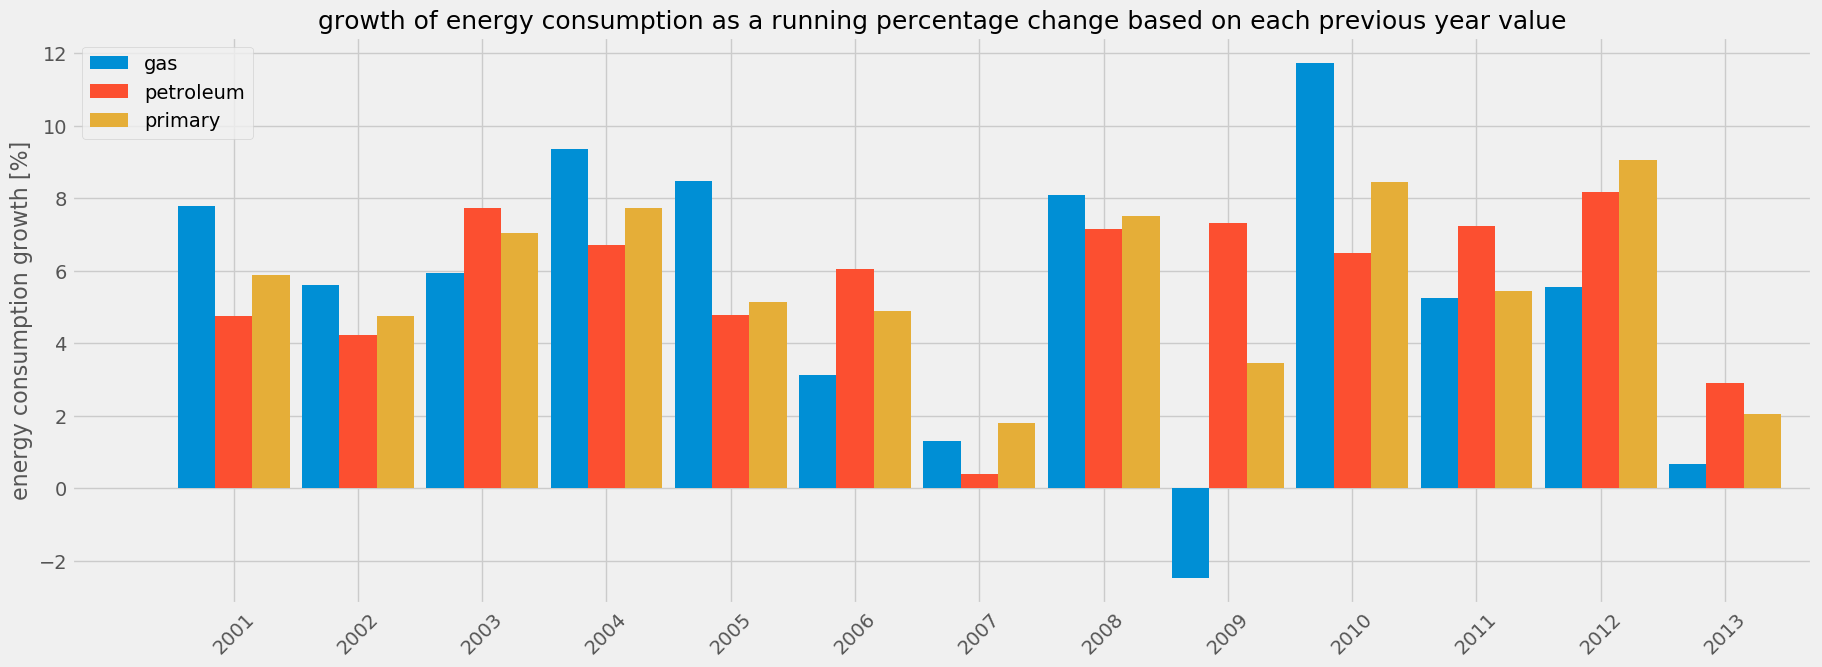

In [424]:
# plotting percentage growth values based on the previous year starting from the year 2000

# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(x_growth))    # the x locations for the groups
width = .3     # the width of the bars: can also be len(x) sequence
in_between = width/2
# add grouped values
plt.bar(ind, gas_growth_running, width,label='gas')
plt.bar(ind+width, petrol_growth_running, width,label='petroleum')
plt.bar(ind+width+width, primary_growth_running, width,label='primary')

# axes ticks
x_ticks_label = list(map(str,x_growth.tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind+width,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)

# modify axes to look nice
# ax.set_axisbelow(True)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.grid(color='gray',alpha=.6)

# limits on axes 
plt.xlim(min(ind)-1,max(ind)+1)
# plt.ylim(0,110)

plt.legend(loc=2,ncol=1,fontsize = 14)

# axes titles
plt.ylabel('energy consumption growth [%]',fontsize = 16)
plt.title('growth of energy consumption as a running percentage change based on each previous year value',fontsize = 18)
plt.show()

C:\Users\SMART\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


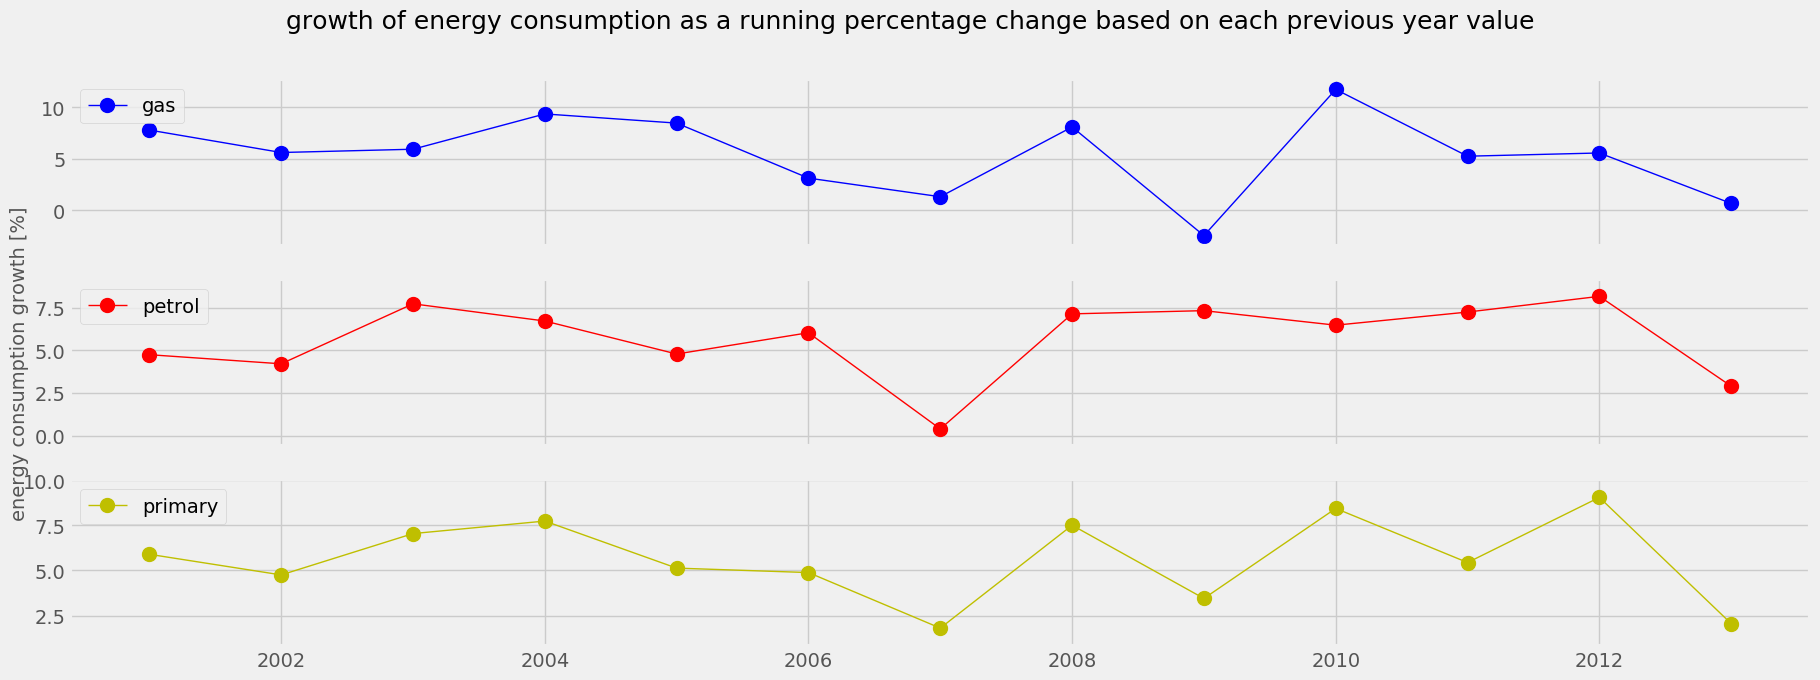

In [469]:
# plotting percentage growth values based on the previous year as a line plot instead of bar plot

# style
plt.style.use('fivethirtyeight')

# multiple line plot

marker_size = 10
lw = 1

fig=plt.figure(figsize=[20,7])

ax1 = fig.add_subplot(3,1,1)
# ax1.set_xlim([min(gas_growth_running),max(gas_growth_running)])
# axes = plt.gca()
# axes.set_xlim([min(gas_growth_running),max(gas_growth_running)])
plt.ylim([min(gas_growth_running)-1,max(gas_growth_running)+1])
plt.plot(x_growth,gas_growth_running,'bo-', linewidth=lw, markersize=marker_size,label='gas')
ax1.legend(loc=2, ncol=1)
plt.tick_params(labelbottom='False')

ax2 = fig.add_subplot(3,1,2)
plt.ylim([min(petrol_growth_running)-1,max(petrol_growth_running)+1])
plt.plot(x_growth,petrol_growth_running,'ro-', linewidth=lw, markersize=marker_size,label='petrol')
ax2.legend(loc=2, ncol=1)
plt.tick_params(labelbottom='False')
plt.ylabel('energy consumption growth [%]',fontsize = 14)

ax3 = fig.add_subplot(3,1,3)
plt.ylim([min(primary_growth_running)-1,max(primary_growth_running)+1])
plt.plot(x_growth,primary_growth_running,'yo-', linewidth=lw, markersize=marker_size,label='primary')
ax3.legend(loc=2, ncol=1)

# figure titles
plt.suptitle('growth of energy consumption as a running percentage change based on each previous year value',fontsize = 18)
# plt.text(0, 0, 'energy consumption growth [%]',fontsize = 16, ha='center', va='center', rotation='vertical')

plt.show()

In [411]:
# show average values:

print(primary_growth_running.mean())
print(gas_growth_running.mean())
print(petrol_growth_running.mean())

5.628438188654863
5.414446461559572
5.684975328507893


above two plots show the percentage increase in consumption based on each previous year. plots show a couple of interesting patterns. first, years 2007, 2009 and 2013 show less than averaged growth in energy ( comparing years 2000-2013). the decrease in energy consumption of 2009 can be explained by the reduction in natural gas consumption solely. between 2001-2013  energy consumption growth rate is about 5.5% yearly. this is both true for primary energy and its two main components. 

we can conclude from the consumption data that SaudiArabia is energy thirsty and this thirst keeps increasing. also, most of its energy is met by petroleum which is also its most economic income source ( since petroleum includes crude oil). 

so we need to see natural gas and petroleum production data to see whether there is a possibility to use more natural gas into the mix to achieve higher economic income in the country. 

also, it will be very insightful to look at electricity consumption data since a large portion of the primary energy is used in electricity generation. 


but first, let us make more sine of the primary energy numbers by looking at consumption data per capita per day.

### Energy and power intensity  

In [509]:
# checking units and availability of the data 

In [507]:
eia_data['energy_consumption_capita'].units

'Million Btu per Person'

In [508]:
eia_data['population'].units

'People in Thousands'

In [510]:
eia_data['energy_consumption_capita']['date'].values

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980], dtype=int64)

In [555]:
eia_data['population']['date'].values

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986,
       1985, 1984, 1983, 1982, 1981, 1980], dtype=int64)

In [561]:
# grapping data for energy intensity

x_intensity= np.flip(eia_data['energy_consumption_capita']['date'].values)
intensity= np.flip(eia_data['energy_consumption_capita']['val'].values)/3412000 #this gives data in TWh/p
intensity_calc = (primary/population[0:-3])/3600
# intensity= np.flip(eia_data['energy_consumption_capita']['val'].values)*293.07107/1e9 #this gives data in TWh/p
population  = np.flip(eia_data['population']['val'][2:].values)*1000

In [536]:
population[-1]/1e6

32.1876

In [554]:
# let's check first data consistency, [does energy intensity times population gives back primary energy consumption ]?

# get the index for both intensity and primary energy data sets at a common year
year = 2013
primary_idx = np.where(x_primary == year)[0][0]
intensity_idx = np.where(x_intensity == year)[0][0]

# calcualte difference [in TWh]
err = (primary[primary_idx]/3600) - (intensity[intensity_idx]*population[intensity_idx])
print( 'difference in [TWh] is: ',err)

difference in [TWh] is:  30.54377985866904


so as can be seen from the large difference between primary energy and energy intensity data seems not to be on the same basis,. it could be that the intensity is calculated using different population than the population given in the population dataset.

so the comparison between datasets shall be at a minimum but we will assess the trends in energy intensity

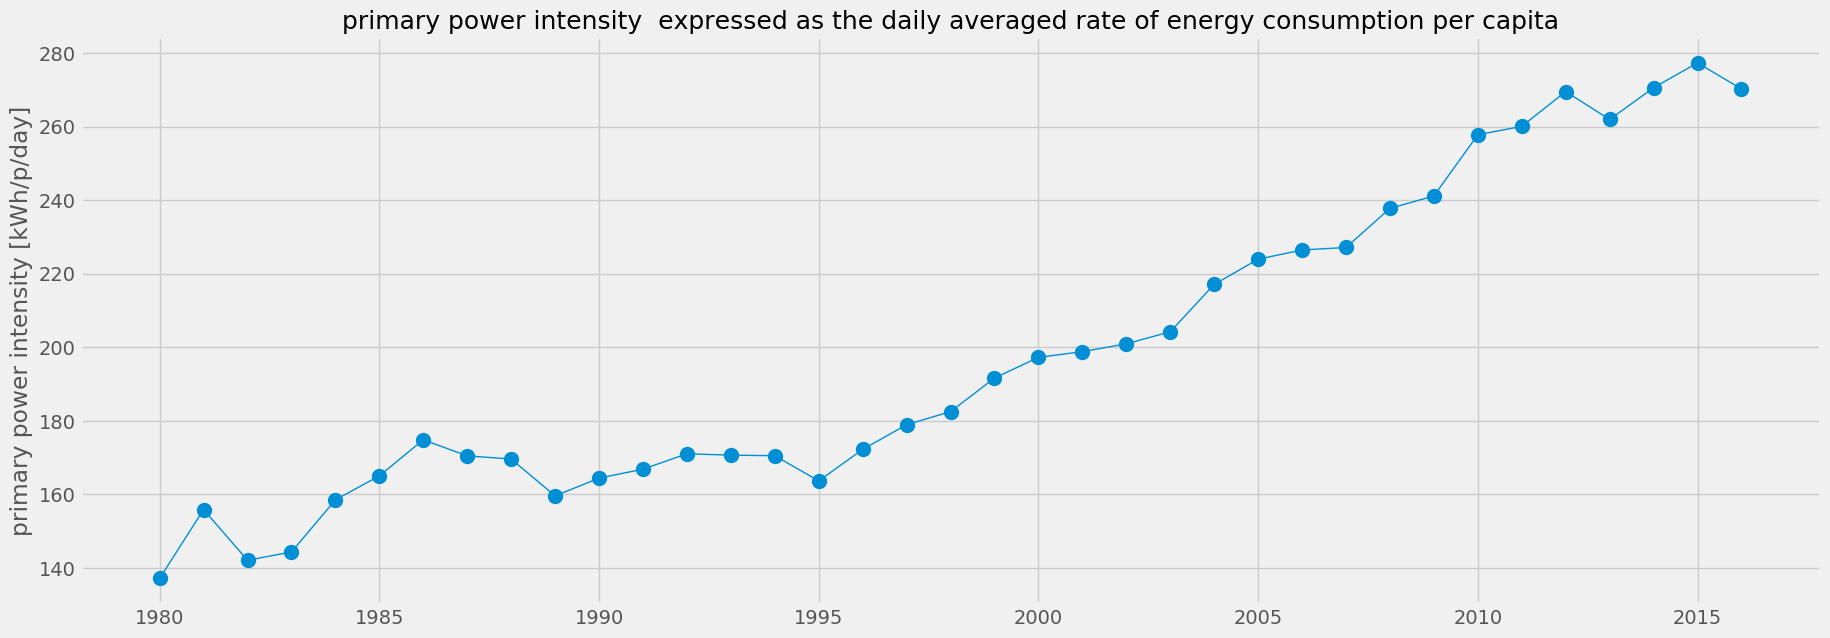

In [577]:
# plotting the power intesity as kWh/p/day 

# style
plt.style.use('fivethirtyeight')

# line plot
marker_size = 10
lw = 1
fig=plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(1,1,1)
plt.plot(x_intensity,intensity*(1e9)/365,'o-', linewidth=lw, markersize=marker_size,label='kWh/p/day')
# plt.xticks(x_intensity)
# figure title
plt.ylabel('primary power intensity [kWh/p/day]')
plt.title('primary power intensity  expressed as the daily averaged rate of energy consumption per capita',fontsize = 18)


plt.show()

the unit used here to express the power intensity is kilowatt-hours per person per day [kWh/p/day]. this is obtained by dividing the yearly energy consumption per capita by the number of days in the year. in effect, this makes the quantity power and not energy and that is why we should interpret the values as the daily averaged rate of energy consumption per capita. power incomes out in a nice normalized unit that we can interpret a bit better than the large energy consumption values of terawatt-hours  [TWh]. expressing power intensity in [kWh/p/day]  is useful because we can relate to it from electricity bills as they are normally reported as kWh consumption in every month.  for instance, if your monthly consumption of electricity about 3000 kWh, and you live by your own ( quite high consumption I would say !)  then your daily power intensity will be 100[kWh/p/day]. so you can use the 100[kWh/p/day] as your meter stick as you look through the values of power intensity plot. notice though that the plot shows the total energy consumption rate and not just the electricity, so put that in perspective as you judge the values. 

the main conclusion that we can draw from the power intensity is that energy consumption increase pattern that we saw earlier is caused by more than population growth alone. this can be inferred because the power intensity shows an increasing trend which means that the unit change in population causes more than a unit change in primary energy consumption. this is can indicate higher economic activities but also could suggest energy consumption efficiency issues. it is really interesting to study the causes that influence the power intensity because it will reveal a lot about the way Saudi Arabia uses energy ( but we will leave that to another day). 

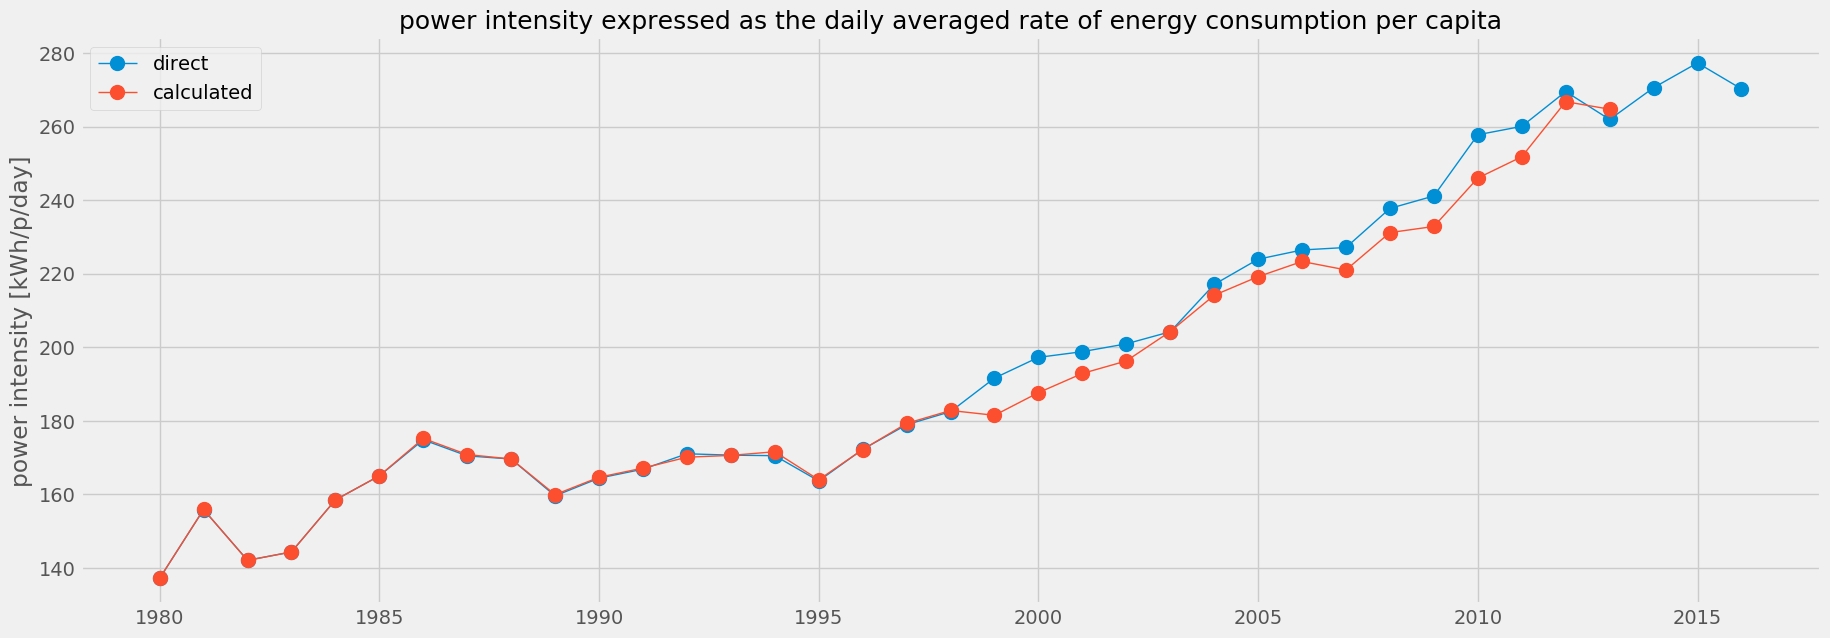

In [589]:
# plotting the power intensity as kWh/p/day also plot the calculated intensity using primary energy data and population data   

# style
plt.style.use('fivethirtyeight')

# line plot
marker_size = 10
lw = 1
fig=plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(1,1,1)
plt.plot(x_intensity,intensity*(1e9)/365,'o-', linewidth=lw, markersize=marker_size,label='direct')
plt.plot(x_primary,intensity_calc*(1e9)/365,'o-', linewidth=lw, markersize=marker_size,label='calculated')
# plt.xticks(x_intensity)
# figure title
plt.ylabel('power intensity [kWh/p/day]')
plt.title('power intensity expressed as the daily averaged rate of energy consumption per capita',fontsize = 18)
plt.legend(loc=2,ncol=1)

plt.show()

the unit used here to express the power intensity is kilowatt-hours per person per day [kWh/p/day]. this is obtained by dividing the yearly energy consumption per capita by the number of days in the year. in effect, this makes the quantity power and not energy and that is why we should interpret the values as the daily averaged rate of energy consumption per capita. power incomes out in a nice normalized unit that we can interpret a bit better than the large energy consumption values of terawatt-hours  [TWh]. expressing power intensity in [kWh/p/day]  is useful because we can relate to it from electricity bills as they are normally reported as kWh consumption in every month.  for instance, if your monthly consumption of electricity about 3000 kWh, and you live by your own ( quite high consumption I would say !)  then your daily power intensity will be 100[kWh/p/day]. so you can use the 100[kWh/p/day] as your meter stick as you look through the values of power intensity plot. notice though that the plot shows the total energy consumption rate and not just the electricity, so put that in perspective as you judge the values. 

the main conclusion that we can draw from the power intensity is that energy consumption increase pattern that we saw earlier is caused by more than population growth alone. this can be inferred because the power intensity shows an increasing trend which means that the unit change in population causes more than a unit change in primary energy consumption. this is can indicate higher economic activities but also could suggest energy consumption efficiency issues. it is really interesting to study the causes that influence the power intensity because it will reveal a lot about the way Saudi Arabia uses energy ( but we will leave that to another day). 

### Electricity

In [595]:
# grapping data for electricity from EIA

x_elec= np.flip(eia_data['electricity_consumption']['date'].values)
elec_cons= np.flip(eia_data['electricity_consumption']['val'].values) #this gives data in TWh
elec_gen= np.flip(eia_data['electricity_generation']['val'].values) #this gives data in TWh
elec_power= np.flip(eia_data['electricity_installed_capacity']['val'].values) #this gives data in GW

In [596]:
# checking units and availability of the data 

In [597]:
eia_data['electricity_generation'].units

'Billion Kilowatthours'

In [598]:
x_elec

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int64)

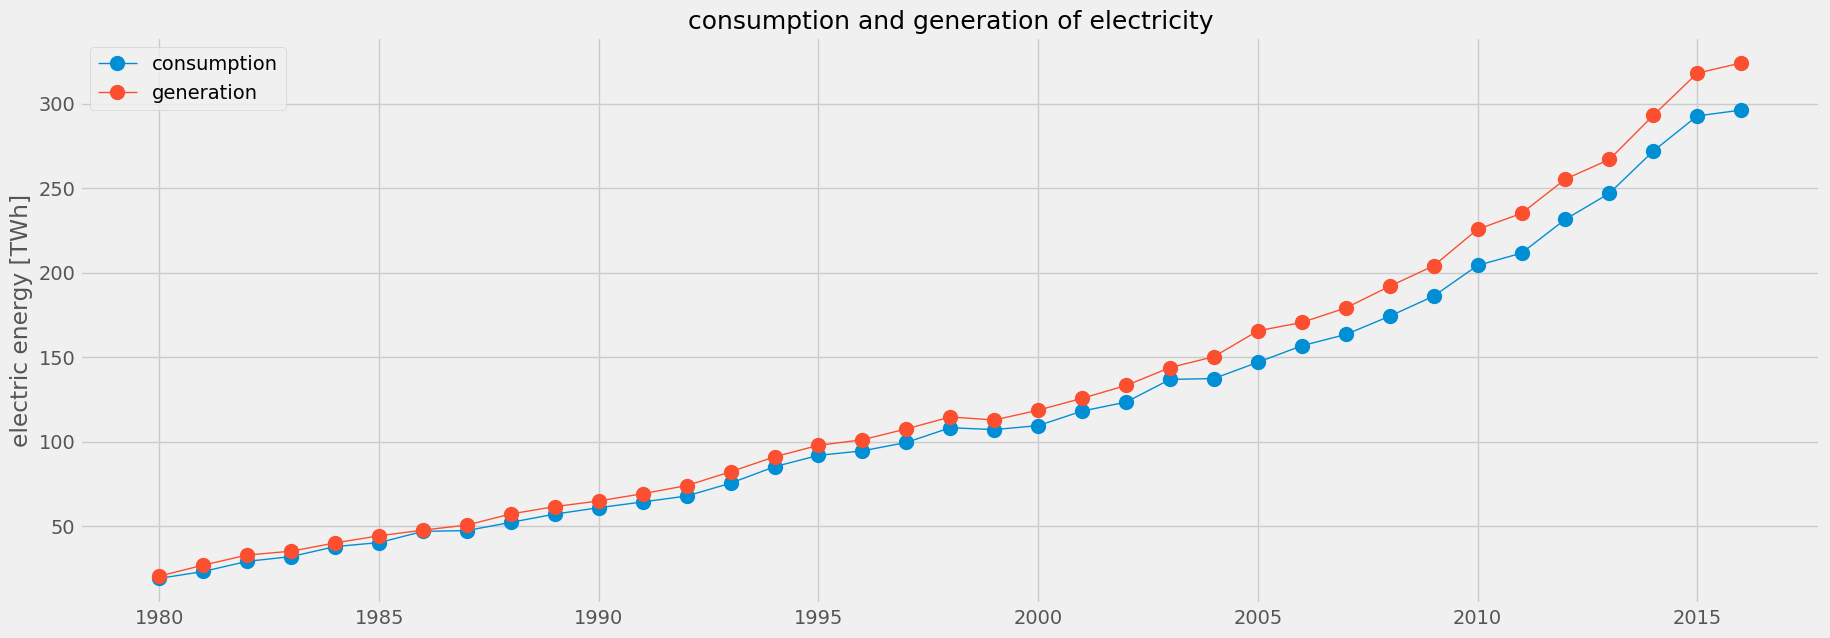

In [576]:
# plotting electricity consumption and generation    

# style
plt.style.use('fivethirtyeight')

# line plot
marker_size = 10
lw = 1
fig=plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(1,1,1)
plt.plot(x_elec,elec_cons,'o-', linewidth=lw, markersize=marker_size,label='consumption')
plt.plot(x_elec,elec_gen,'o-', linewidth=lw, markersize=marker_size,label='generation')

# figure title
plt.ylabel('electric energy [TWh]')
plt.title('consumption and generation of electricity',fontsize = 18)
plt.legend(loc=2,ncol=1)

plt.show()

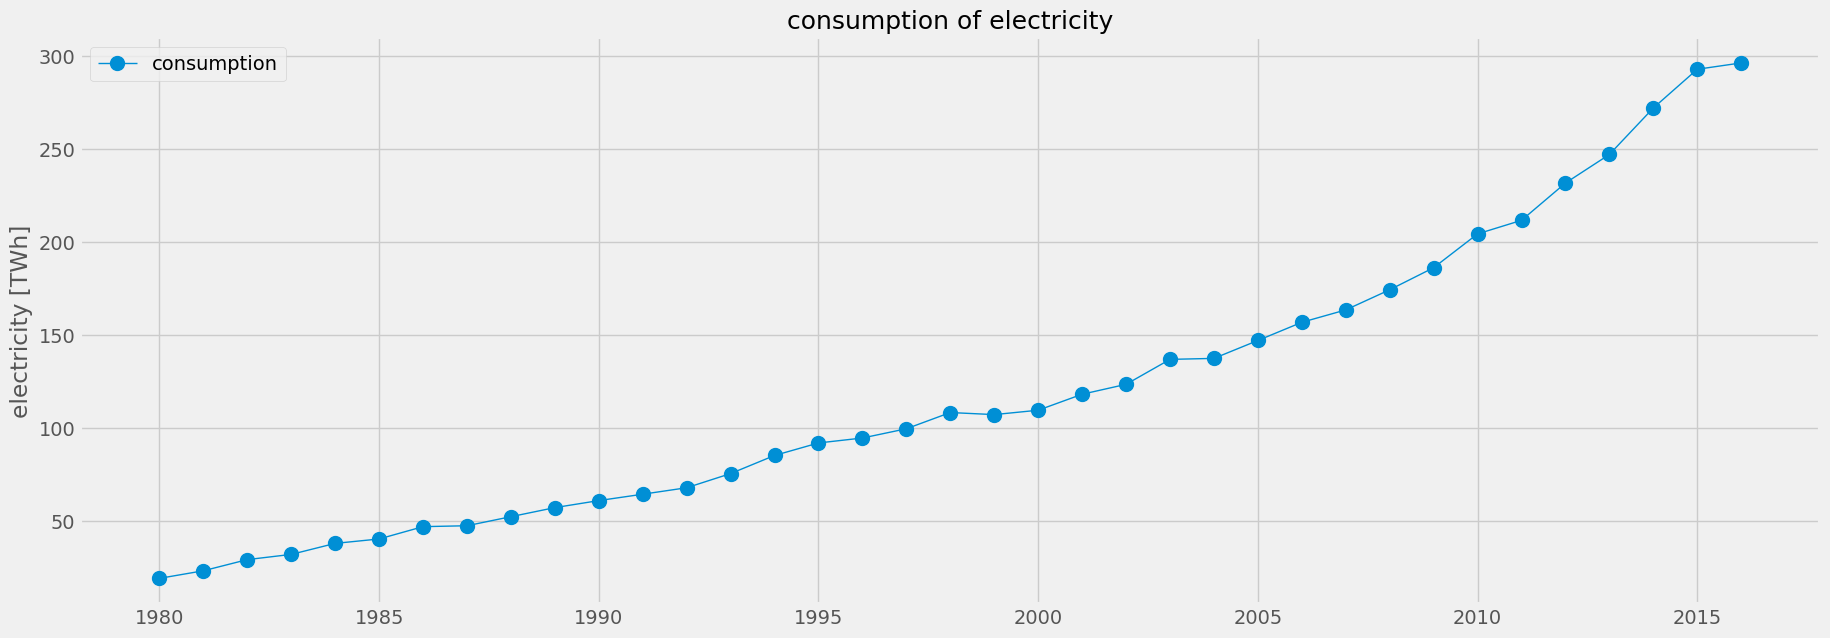

In [590]:
# plotting electricity consumption 

# style
plt.style.use('fivethirtyeight')

# line plot
marker_size = 10
lw = 1
fig=plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(1,1,1)
plt.plot(x_elec,elec_cons,'o-', linewidth=lw, markersize=marker_size,label='consumption')

# figure title
plt.ylabel('electricity [TWh]')
plt.title('consumption of electricity',fontsize = 18)
plt.legend(loc=2,ncol=1)

plt.show()

In [585]:
# calculating electricity power intensity 
elec_intensity = (1e9/365)*elec_cons/population # in [kWh/p/day]

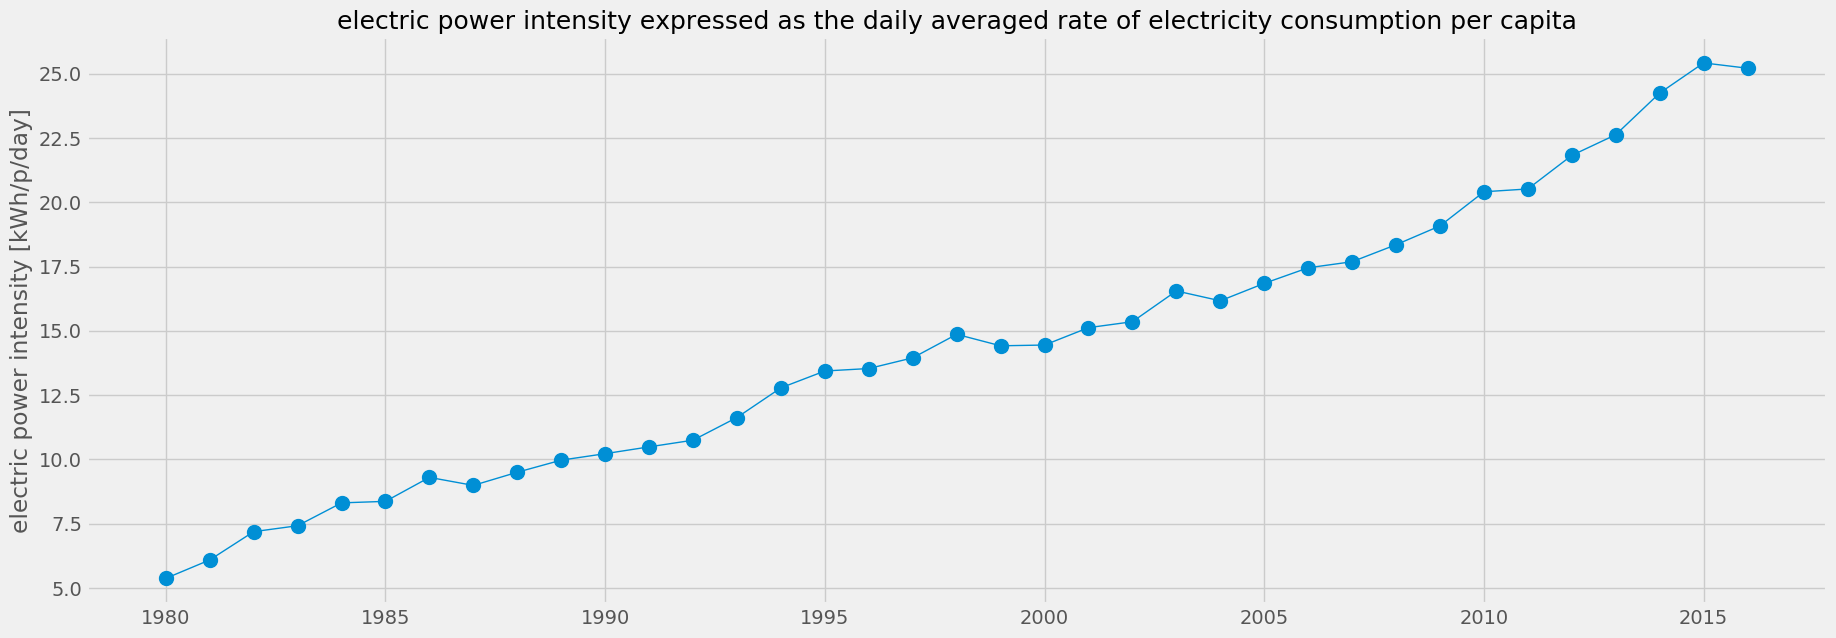

In [588]:
# plotting the electric power intesity as kWh/p/day 

# style
plt.style.use('fivethirtyeight')

# line plot
marker_size = 10
lw = 1
fig=plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(1,1,1)
plt.plot(x_elec,elec_intensity,'o-', linewidth=lw, markersize=marker_size,label='kWh/p/day')
# plt.xticks(x_intensity)
# figure title
plt.ylabel('electric power intensity [kWh/p/day]')
plt.title('electric power intensity expressed as the daily averaged rate of electricity consumption per capita',fontsize = 18)


plt.show()

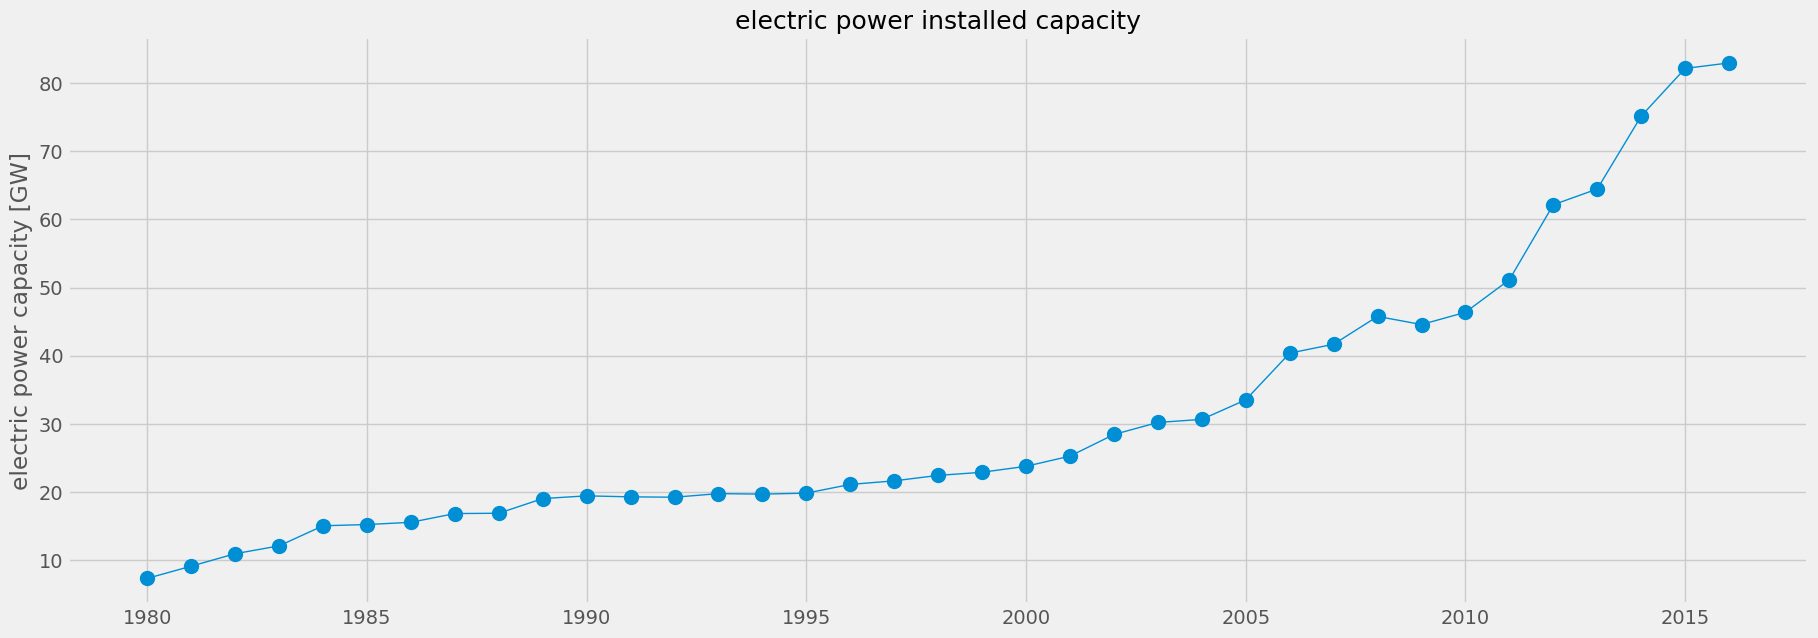

In [602]:
# plotting power installed capacity 

# style
plt.style.use('fivethirtyeight')

# line plot
marker_size = 10
lw = 1
fig=plt.figure(figsize=[20,7])
ax1 = fig.add_subplot(1,1,1)
plt.plot(x_elec,elec_power,'o-', linewidth=lw, markersize=marker_size,label='Power')
# plt.xticks(x_intensity)
# figure title
plt.ylabel('electric power capacity [GW]')
plt.title('electric power installed capacity',fontsize = 18)


plt.show()


In [611]:
# making percentage growth values based on the previous year starting from the year 2000 for electric consumption and power installed capacity

# initialize arrays
x_growth_elec = x_elec[idx1+1:]
elec_cons_growth_running  = np.zeros(len(x_growth_elec))
elec_power_growth_running  = np.zeros(len(x_growth_elec))


# for loops to calculate running growth percentages 
for i,_ in enumerate(x_growth_elec):
    
    elec_cons_growth_running[i] = 100*(elec_cons[idx1+1+i]-elec_cons[idx1+i])/elec_cons[idx1+i]
    elec_power_growth_running[i] = 100*(elec_power[idx1+1+i]-elec_power[idx1+i])/elec_power[idx1+i]


In [718]:
# calculating percentage growth values based on the year 2000  for electric consumption and power installed capacity
elec_cons_growth= 100*(elec_cons[idx1+1:]-elec_cons[idx1])/elec_cons[idx1]
elec_power_growth=  100*(elec_power[idx1+1:]-elec_power[idx1])/elec_power[idx1]

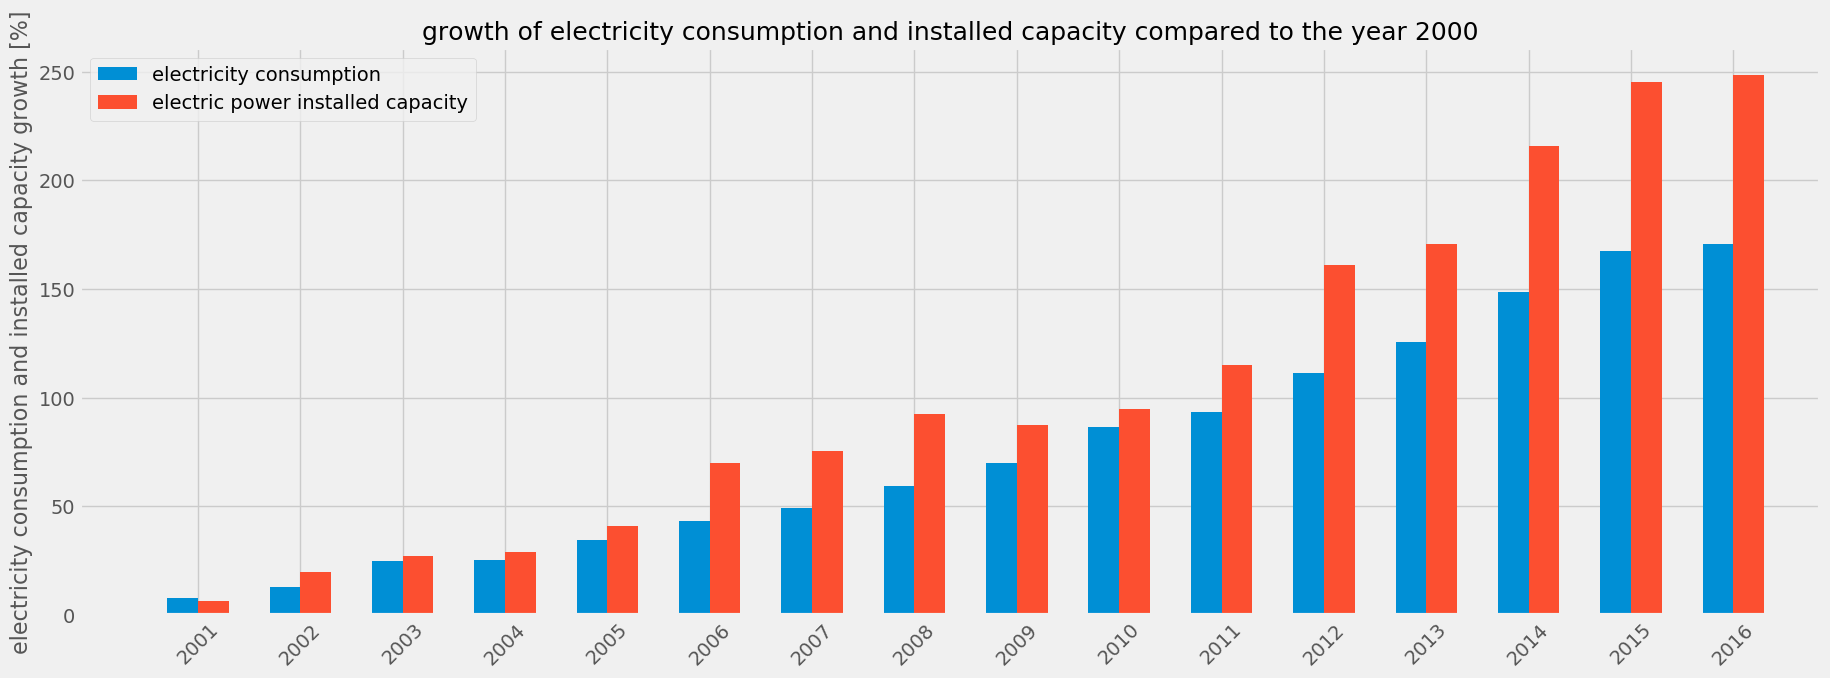

In [721]:
# plotting percentage growth values based on  the year 2000  for electric consumption and power installed capacity

# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(x_growth_elec))    # the x locations for the groups
width = .3     # the width of the bars: can also be len(x) sequence
in_between = width/2

# add grouped values
plt.bar(ind, elec_cons_growth, width,label='electricity consumption')
plt.bar(ind+width, elec_power_growth, width,label='electric power installed capacity')


# axes ticks
x_ticks_label = list(map(str,x_growth_elec.tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind+.5*width,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)

# limits on axes 
plt.xlim(min(ind)-1,max(ind)+1)
# plt.ylim(0,110)

plt.legend(loc=2,ncol=1,fontsize = 14)

# axes titles
plt.ylabel('electricity consumption and installed capacity growth [%]',fontsize = 16)
plt.title('growth of electricity consumption and installed capacity compared to the year 2000',fontsize = 18)
plt.show()

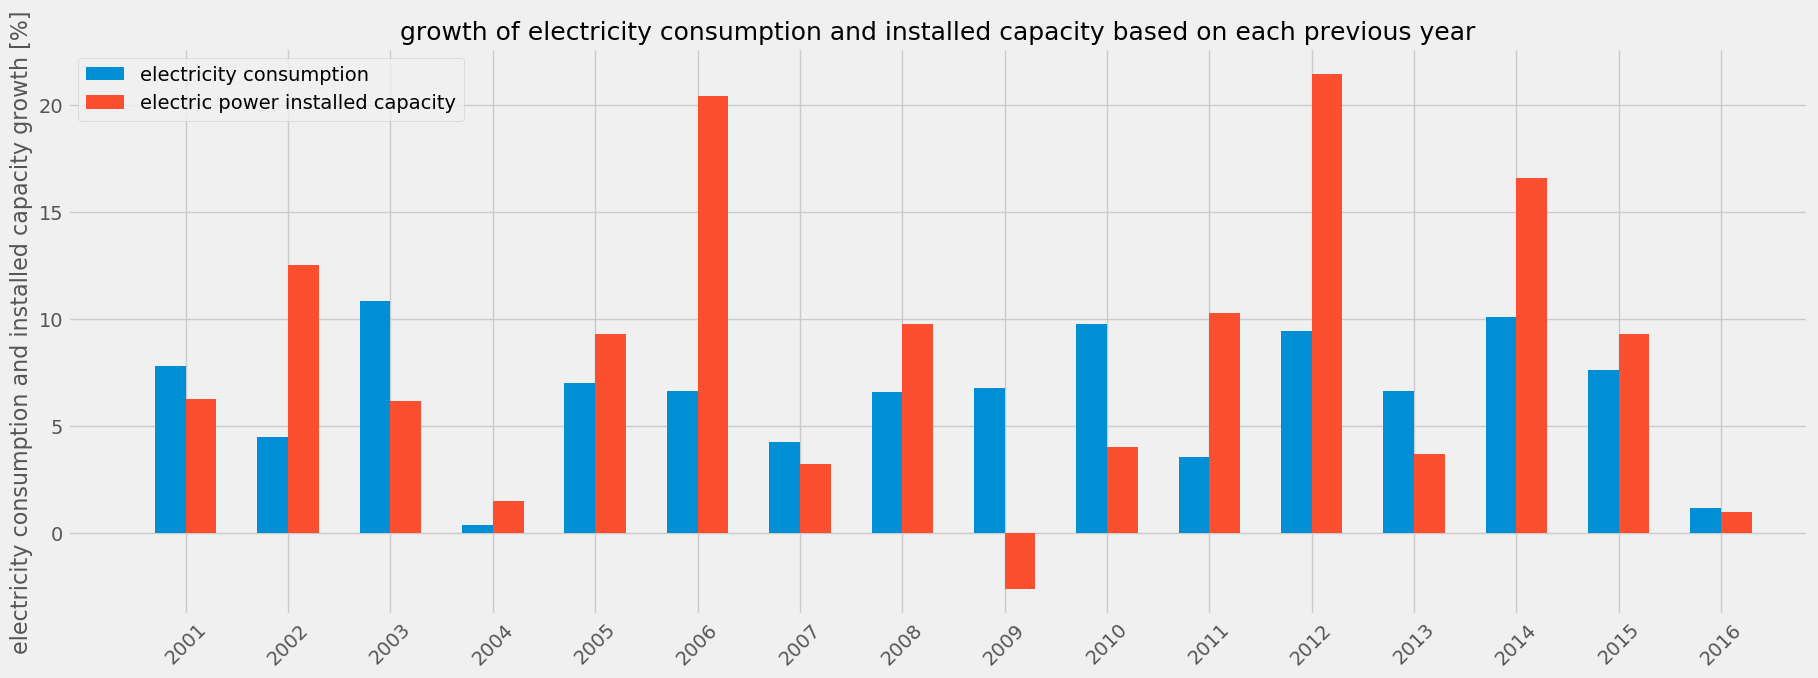

In [612]:
# plotting percentage growth values based on the previous year starting from the year 2000

# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(x_growth_elec))    # the x locations for the groups
width = .3     # the width of the bars: can also be len(x) sequence
in_between = width/2

# add grouped values
plt.bar(ind, elec_cons_growth_running, width,label='electricity consumption')
plt.bar(ind+width, elec_power_growth_running, width,label='electric power installed capacity')


# axes ticks
x_ticks_label = list(map(str,x_growth_elec.tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind+.5*width,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)

# limits on axes 
plt.xlim(min(ind)-1,max(ind)+1)
# plt.ylim(0,110)

plt.legend(loc=2,ncol=1,fontsize = 14)

# axes titles
plt.ylabel('electricity consumption and installed capacity growth [%]',fontsize = 16)
plt.title('growth of electricity consumption and installed capacity based on each previous year',fontsize = 18)
plt.show()

In [638]:
# print mean values of growth in electricity 
print('elec_cons_growth mean is: {:.4f}'.format(elec_cons_growth_running.mean()))
print('elec_pwoer_growth mean is: {:.4f}'.format(elec_power_growth_running.mean()))

elec_cons_growth mean is: 6.4583
elec_pwoer_growth mean is: 8.3183


In [640]:
print('Pearson correlation between electricity consumption and  power capacity is:{:.4f} '.format(np.corrcoef(elec_cons,elec_power)[0,1]))

 pearson correlation between electricity consumption and  power capacity is:0.9802 


In [641]:
print('Pearson correlation between electricity and primary consumption is:{:.4f}'.format(np.corrcoef(elec_cons[:-3],primary)[0,1]))

Pearson correlation between electricity and primary consumption is:0.9956


Comment on above electricity data trends and the printed values 

### Explore and analyze KARSARC data

In [705]:
# calculating a column of a sum of the differ economy sector consumption 
elec_cons_sector.drop('Total',axis=1,inplace=True)
elec_cons_sector['Total'] = elec_cons_sector.iloc[:,1:].sum(1)
elec_cons_sector

,year,Residential,Commercial,Government,Industrial,Other,Total
0,2005,78.304,15.580,16.675,33.800,8.924,153.283
1,2006,86.029,17.075,18.005,32.549,9.497,163.155
2,2007,89.904,19.440,19.802,30.635,10.001,169.782
3,2008,96.687,21.366,20.457,32.421,10.166,181.097
4,2009,100.832,23.605,22.248,34.654,12.133,193.472
5,2010,108.627,29.310,24.513,38.569,11.242,212.261
6,2011,109.262,33.008,23.922,42.129,11.342,219.663
7,2012,120.246,39.810,26.089,41.712,12.434,240.291
8,2013,125.678,39.499,27.383,51.080,13.046,256.686
9,2014,135.907,42.855,30.011,51.499,14.230,274.502


In [717]:
# calculating Dataframe with the percentage of electricity usage for each economy sector
elec_cons_sector_perc= elec_cons_sector.iloc[:,1:-1].mul(1/elec_cons_sector['Total'],axis=0)
elec_cons_sector_perc['year'] = elec_cons_sector['year']

# rearranging columns order
cols = elec_cons_sector_perc.columns.tolist()
cols = cols[-1:] + cols[:-1]
elec_cons_sector_perc = elec_cons_sector_perc[cols] 
elec_cons_sector_perc

,year,Residential,Commercial,Government,Industrial,Other
0,2005,0.510846,0.101642,0.108786,0.220507,0.058219
1,2006,0.527284,0.104655,0.110355,0.199497,0.058208
2,2007,0.529526,0.114500,0.116632,0.180437,0.058905
3,2008,0.533896,0.117981,0.112962,0.179026,0.056136
4,2009,0.521171,0.122007,0.114993,0.179116,0.062712
5,2010,0.511761,0.138085,0.115485,0.181706,0.052963
6,2011,0.497407,0.150267,0.108903,0.191789,0.051634
7,2012,0.500418,0.165674,0.108573,0.173590,0.051746
8,2013,0.489618,0.153881,0.106679,0.198998,0.050825
9,2014,0.495104,0.156119,0.109329,0.187609,0.051839


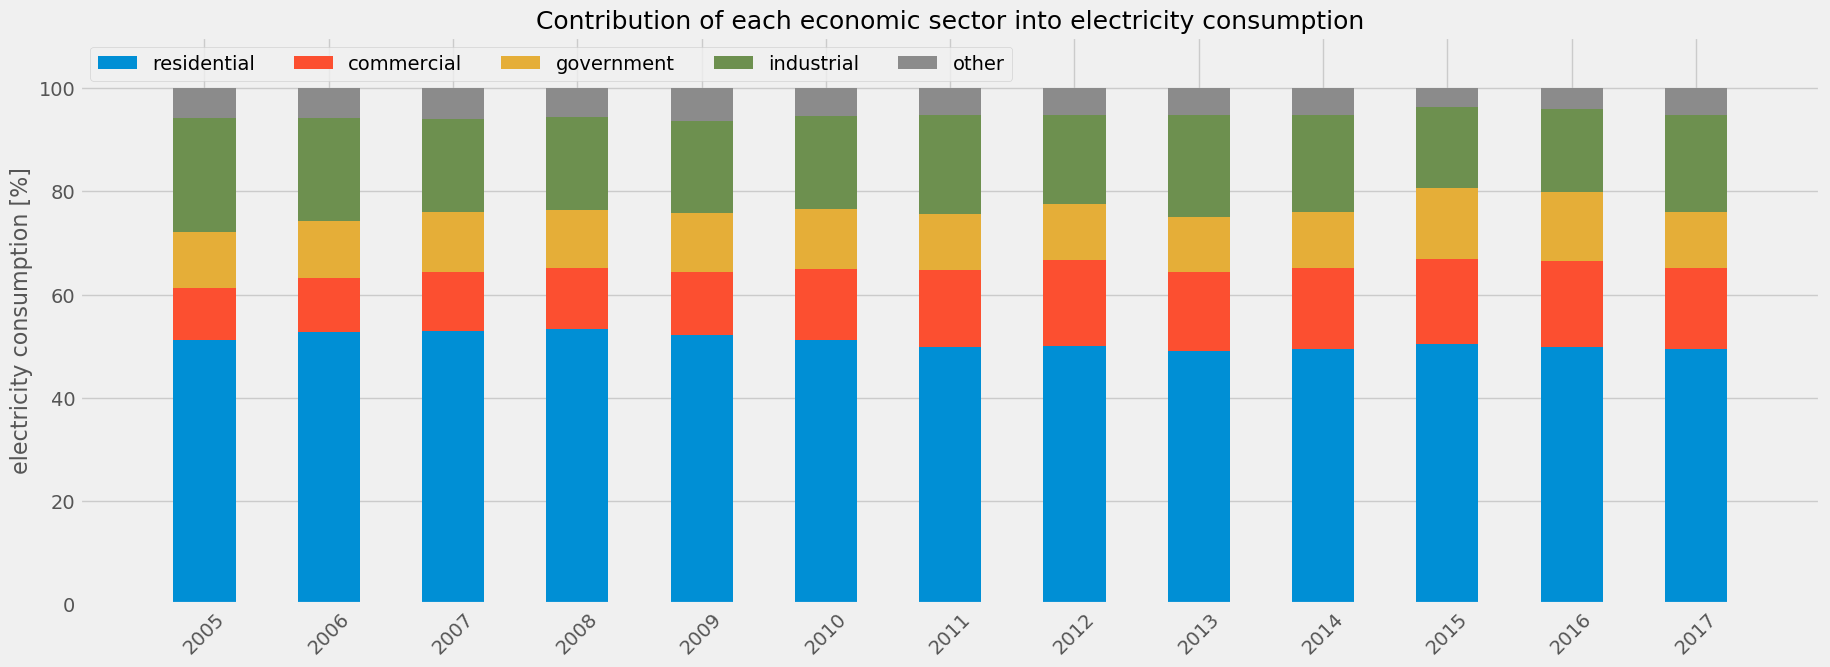

In [735]:
# plotting contribution of each economic sector into  electricity consumption 

# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(elec_cons_sector_perc['year']))    # the x locations for the groups
width = .5       # the width of the bars: can also be len(x) sequence

# add stacked values
btm=0
plt.bar(ind, 100*elec_cons_sector_perc['Residential'], width,label='residential')
btm = 100*elec_cons_sector_perc['Residential']
plt.bar(ind, 100*elec_cons_sector_perc['Commercial'], width,label='commercial',bottom=btm)
btm = btm+100*elec_cons_sector_perc['Commercial']
plt.bar(ind, 100*elec_cons_sector_perc['Government'], width,label='government',bottom=btm)
btm = btm+100*elec_cons_sector_perc['Government']
plt.bar(ind, 100*elec_cons_sector_perc['Industrial'], width,label='industrial',bottom=btm)
btm = btm + 100*elec_cons_sector_perc['Industrial']
plt.bar(ind, 100*elec_cons_sector_perc['Other'], width,label='other',bottom=btm)

# axes ticks
x_ticks_label = list(map(str,elec_cons_sector_perc['year'].tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)

# limits on axes 
plt.xlim(min(ind)-1,max(ind)+1)
plt.ylim(0,110)

plt.legend(loc=2,ncol=5,fontsize = 14)

# axes titles
plt.ylabel('electricity consumption [%]',fontsize = 16)
plt.title('Contribution of each economic sector into electricity consumption',fontsize = 18)
plt.show()

In [733]:
100*elec_cons_sector_perc.mean(0)[1:]

Residential    50.873141
Commercial     13.943972
Government     11.483356
Industrial     18.456202
Other           5.243329
dtype: float64

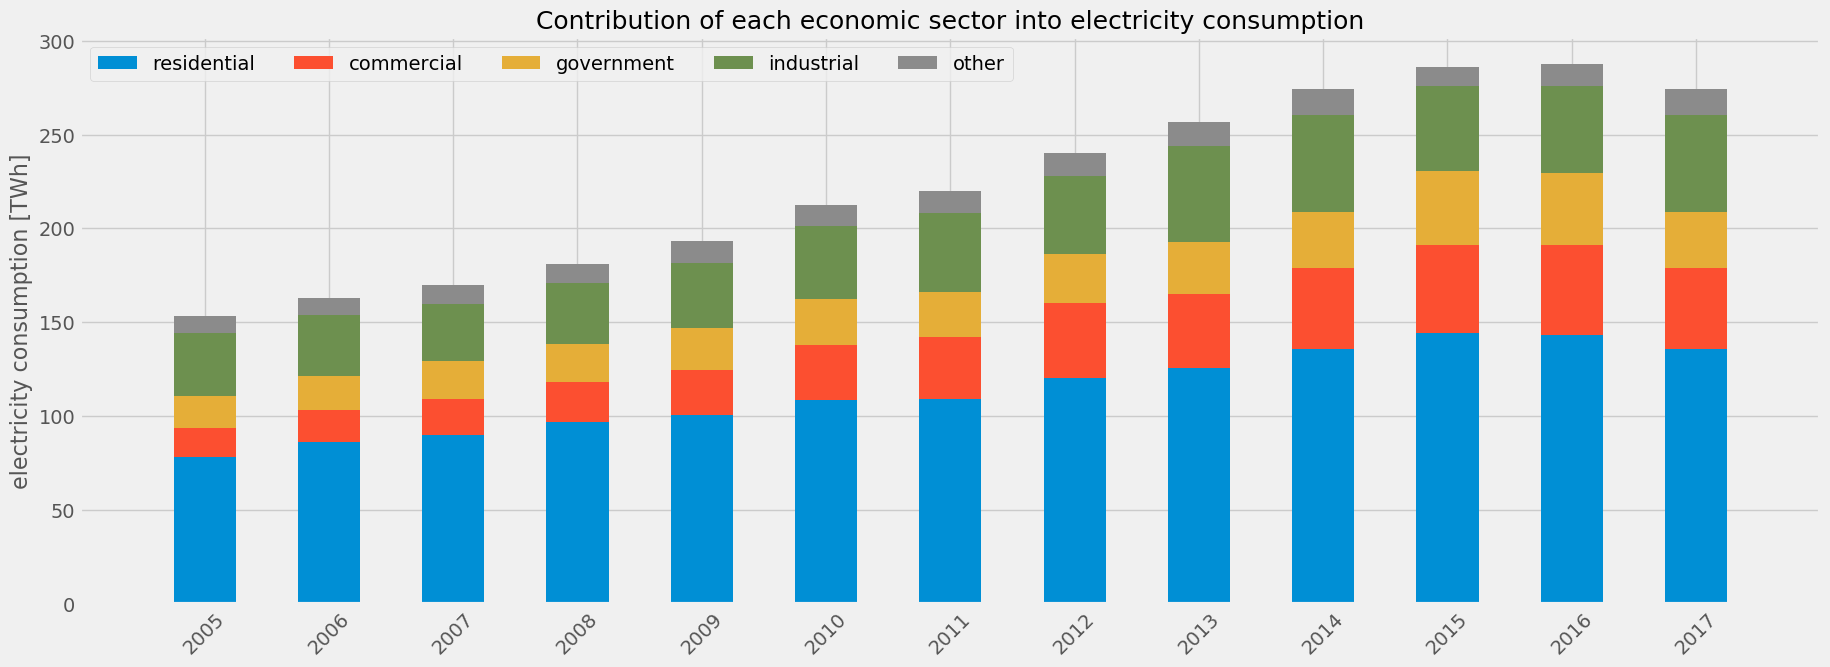

In [738]:
# plotting contribution of each economic sector into  electricity consumption 

# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(elec_cons_sector['year']))    # the x locations for the groups
width = .5       # the width of the bars: can also be len(x) sequence

# add stacked values
btm=0
plt.bar(ind, elec_cons_sector['Residential'], width,label='residential')
btm = elec_cons_sector['Residential']
plt.bar(ind, elec_cons_sector['Commercial'], width,label='commercial',bottom=btm)
btm = btm+elec_cons_sector['Commercial']
plt.bar(ind, elec_cons_sector['Government'], width,label='government',bottom=btm)
btm = btm+elec_cons_sector['Government']
plt.bar(ind, elec_cons_sector['Industrial'], width,label='industrial',bottom=btm)
btm = btm + elec_cons_sector['Industrial']
plt.bar(ind, elec_cons_sector['Other'], width,label='other',bottom=btm)

# axes ticks
x_ticks_label = list(map(str,elec_cons_sector['year'].tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)

# limits on axes 
plt.xlim(min(ind)-1,max(ind)+1)
# plt.ylim(0,110)

plt.legend(loc=2,ncol=5,fontsize = 14)

# axes titles
plt.ylabel('electricity consumption [TWh]',fontsize = 16)
plt.title('Contribution of each economic sector into electricity consumption',fontsize = 18)
plt.show()

In [761]:
# calculating percentage change in electricity for each economic sector based on values of 2005  
elec_cons_sector_growth=(100*((elec_cons_sector).values-(elec_cons_sector).values[0])/((elec_cons_sector).values[0]))[:,1:]

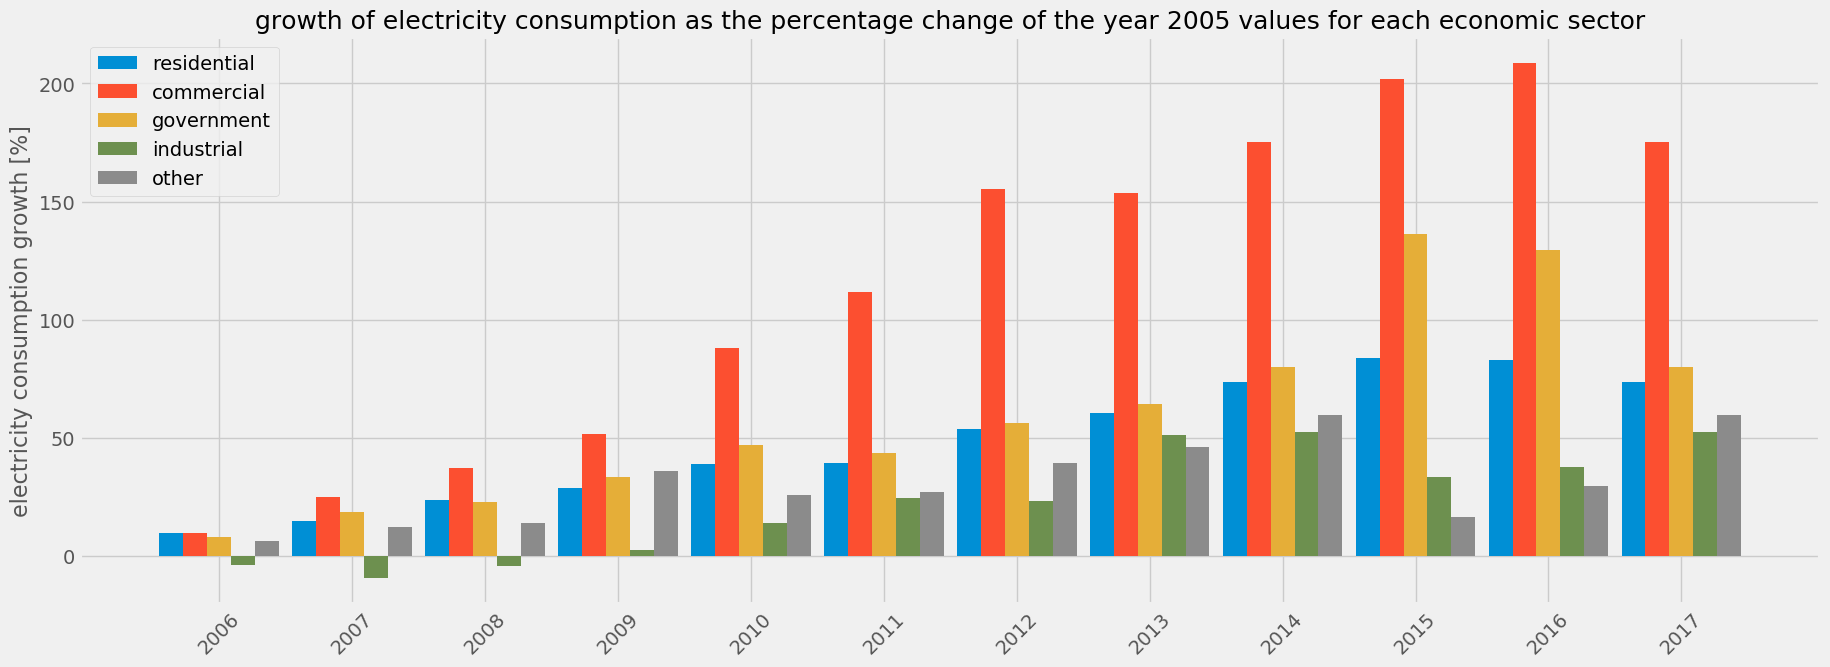

In [774]:
# plotting percentage growth values based on the year 2005 as a grouped bar chart 


# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(elec_cons_sector['year'][1:]))    # the x locations for the groups
width = .18     # the width of the bars: can also be len(x) sequence
in_between = width/2
# add grouped values
plt.bar(ind, elec_cons_sector_growth[1:,0], width,label='residential')
plt.bar(ind+width, elec_cons_sector_growth[1:,1], width,label='commercial')
plt.bar(ind+width+width, elec_cons_sector_growth[1:,2], width,label='government')
plt.bar(ind+width+width+width, elec_cons_sector_growth[1:,3], width,label='industrial')
plt.bar(ind+width+width+width+width, elec_cons_sector_growth[1:,4], width,label='other')

# axes ticks
x_ticks_label = list(map(str,elec_cons_sector['year'][1:].tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind+width+width,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)


# limits on axes 
# plt.xlim(min(ind)-1,max(ind)+1)
# plt.ylim(0,110)

plt.legend(loc=2,ncol=1,fontsize = 14)

# axes titles
plt.ylabel('electricity consumption growth [%]',fontsize = 16)
plt.title('growth of electricity consumption as the percentage change of the year 2005 values for each economic sector',fontsize = 18)
plt.show()

In [782]:
elec_cons_sector_growth[1:,0:-1].mean(0)

array([ 48.601604  , 116.09060762,  59.98150925,  22.875     ,
        31.0137457 ])

comment on the distribution of electricity consumption between the different economic sector  and also on the growth of the economic sector in terms of using electricity

In [797]:
# analyzing the fuel mix that goes into generating the electricity and sea water desalination industries
elec_cons_mix

,year,Natural_gas,crude_oil,HFO,Diesel,Total
0,2007,1212,322,423,387,2344
1,2008,1273,381,466,418,2538
2,2009,1222,805,317,452,2796
3,2010,1284,1048,252,457,3041
4,2011,1377,1042,267,448,3134
5,2012,1512,1045,295,468,3320
6,2013,1605,964,333,508,3410
7,2014,1506,1089,384,448,3427
8,2015,1556,1143,428,454,3581
9,2016,1947,931,633,329,3840


In [798]:
# making a column for total petroleum contribution
elec_cons_mix['Petroluem']=elec_cons_mix[['crude_oil','HFO','Diesel']].sum(1)

In [799]:
elec_cons_mix

,year,Natural_gas,crude_oil,HFO,Diesel,Total,Petroluem
0,2007,1212,322,423,387,2344,1132
1,2008,1273,381,466,418,2538,1265
2,2009,1222,805,317,452,2796,1574
3,2010,1284,1048,252,457,3041,1757
4,2011,1377,1042,267,448,3134,1757
5,2012,1512,1045,295,468,3320,1808
6,2013,1605,964,333,508,3410,1805
7,2014,1506,1089,384,448,3427,1921
8,2015,1556,1143,428,454,3581,2025
9,2016,1947,931,633,329,3840,1893


In [792]:
cols[2] 

'Natural_gas'

In [800]:
# rearranging columns order
cols = elec_cons_mix.columns.tolist()
cols = [cols[0]]+ [cols[-1]]+ cols[1:-1]
elec_cons_mix = elec_cons_mix[cols] 
elec_cons_mix

,year,Petroluem,Natural_gas,crude_oil,HFO,Diesel,Total
0,2007,1132,1212,322,423,387,2344
1,2008,1265,1273,381,466,418,2538
2,2009,1574,1222,805,317,452,2796
3,2010,1757,1284,1048,252,457,3041
4,2011,1757,1377,1042,267,448,3134
5,2012,1808,1512,1045,295,468,3320
6,2013,1805,1605,964,333,508,3410
7,2014,1921,1506,1089,384,448,3427
8,2015,2025,1556,1143,428,454,3581
9,2016,1893,1947,931,633,329,3840


In [810]:
# calculate the percentage of petrol and natural gas fuel energy used in electricity generation  

elec_cons_mix_petrol = elec_cons_mix['Petroluem'].values/elec_cons_mix['Total'].values
elec_cons_mix_gas = elec_cons_mix['Natural_gas'].values/elec_cons_mix['Total'].values

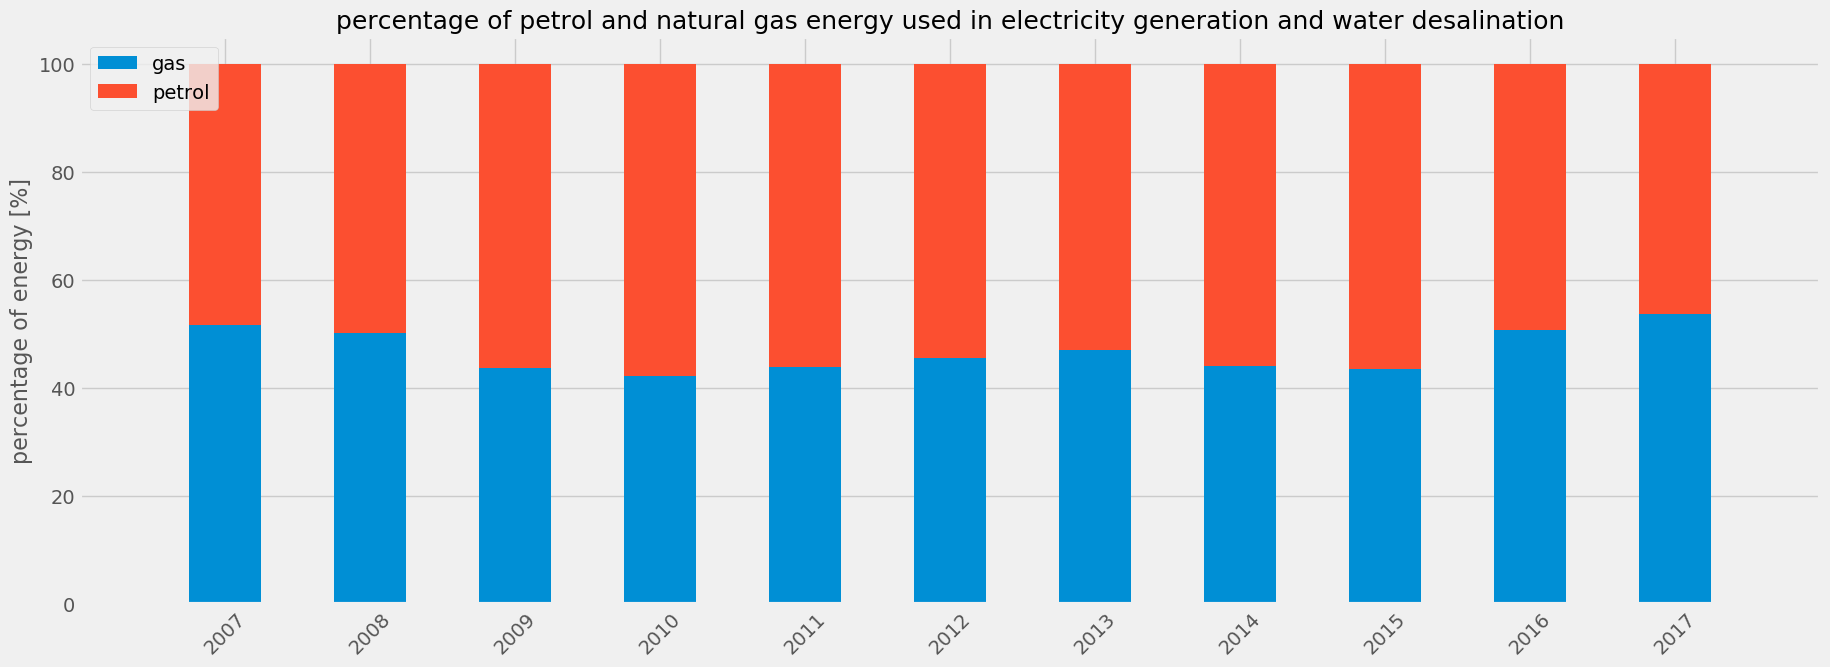

In [850]:
# plotting the percentage of petrol and natural gas fuel energy used in electricity generation  

# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(elec_cons_mix['year']))    # the x locations for the groups
width = .5       # the width of the bars: can also be len(x) sequence

# add stacked values
btm=0
plt.bar(ind, 100*elec_cons_mix_gas, width,label='gas')
btm = 100*elec_cons_mix_gas
plt.bar(ind, 100*elec_cons_mix_petrol, width,label='petrol',bottom=btm)

# axes ticks
x_ticks_label = list(map(str,elec_cons_mix['year'].tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)

# limits on axes 
plt.xlim(min(ind)-1,max(ind)+1)
# plt.ylim(0,110)

plt.legend(loc=2,ncol=1,fontsize = 14)

# axes titles
plt.ylabel('percentage of energy [%]',fontsize = 16)
plt.title('percentage of petrol and natural gas energy used in electricity generation and water desalination',fontsize = 18)
plt.show()

In [849]:
print('Average fuel mix in electricity generation and water desalination (2007-2017):')
print('-- Natural gas: {:.3f}%'.format(100*elec_cons_mix_gas.mean()))
print('-- Petrol: {:.3f}%'.format(100*elec_cons_mix_petrol.mean()))

Average fuel mix in electricity generation and water desalination (2007-2017):
-- Natural gas: 46.924%
-- Petrol: 53.076%


In [851]:
# making  array with primary energy and energy used in electricity 
cond1 = np.where(x_primary==2007)[0][0]
cond2 = np.where(elec_cons_mix['year'].values==2013)[0][0]

arr = np.column_stack((x_primary[cond1:],(elec_cons_mix['Total'].values[0:cond2+1])/3.412,(primary[cond1:])/3600))

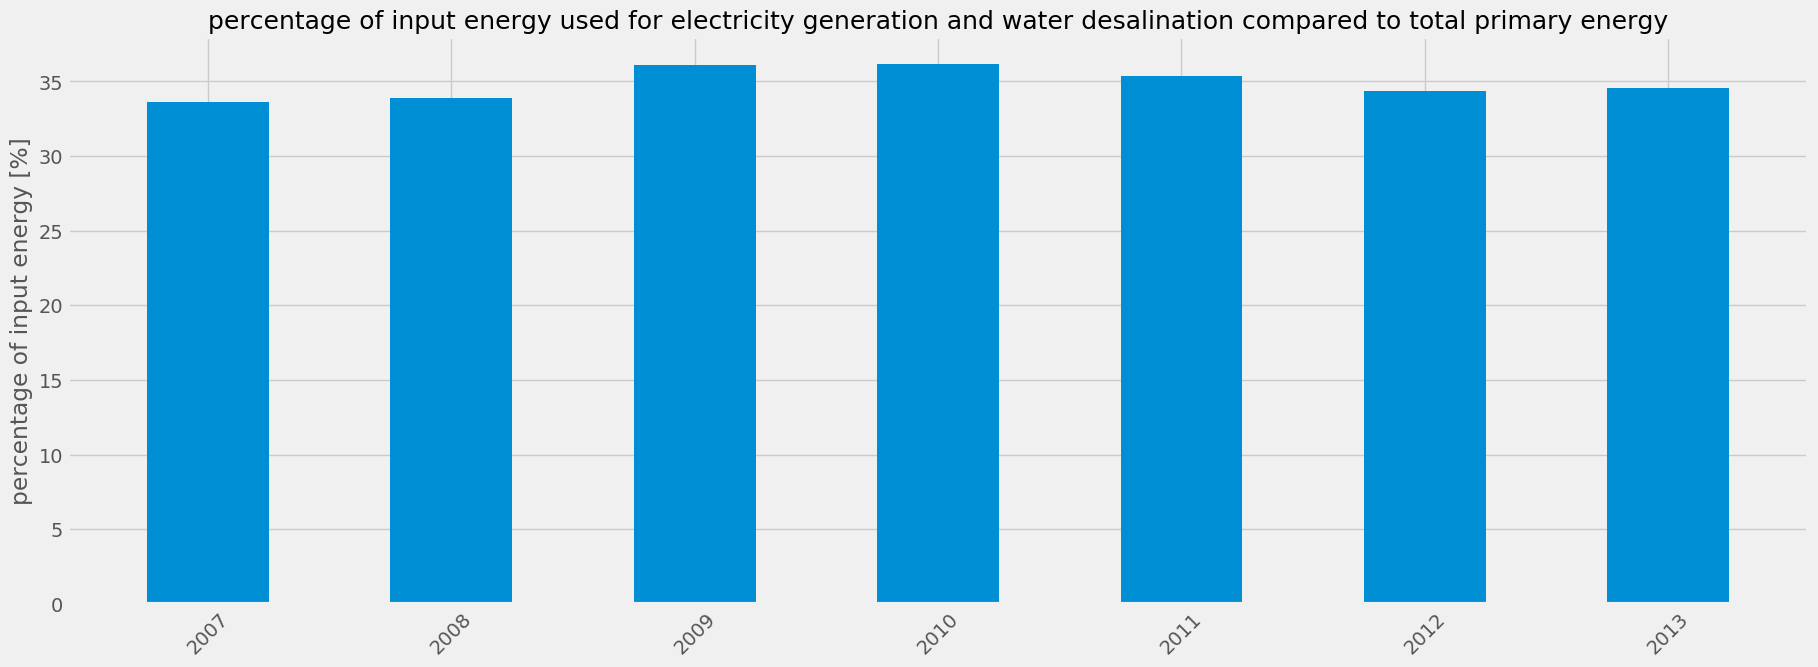

In [865]:
# plotting percentage of input energy used for electricity generation and water desalination compared to total primary energy

# style
plt.style.use('fivethirtyeight')


# stacked bar chart 
fig=plt.figure(figsize=[20,7])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(arr[:,0]))    # the x locations for the groups
width = .5     # the width of the bars: can also be len(x) sequence
in_between = width/2
# add grouped values
plt.bar(ind,100*arr[:,1]/arr[:,2], width,label='percentage of electricity and water desalination input energy')

# axes ticks
x_ticks_label = list(map(str,arr[:,0].astype('int').tolist())) # convert the date array from numeric to string to use it in x ticks
plt.xticks(ind,x_ticks_label,fontsize=14,rotation = '45') 
plt.yticks(fontsize=14)


# # line plot
# marker_size = 10
# lw = 1
# fig=plt.figure(figsize=[20,7])
# ax1 = fig.add_subplot(1,1,1)
# plt.plot(arr[:,0],100*arr[:,1]/arr[:,2],'o-', linewidth=lw, markersize=marker_size,
#          label='percentage of electricity and water desalination input energy')

# figure title
plt.ylabel('percentage of input energy [%]')
plt.title('percentage of input energy used for electricity generation and water desalination compared to total primary energy'
          ,fontsize = 18)


plt.show()


In [856]:
print('percentage of input energy used for electricity generation and water desalination (2007-2013):')
print('{:.3f} %'.format((100*arr[:,1]/arr[:,2]).mean()))


percentage of input energy used for electricity generation and water desalination (2007-2013):
34.870 %
